## Project Proposal

### Arnab Dey Sarkar
# Project: FPoliSolution

In this project we need to study high frequency data to estimate before hand when some heavy machinary is going to break down.

I am doing my research in computational neuroscience and I also want to learn about financial quant related analysis. In both these situation, one thing is definitely common, which is Time series. Although we will learn it well next semester. I thought to do some related work and I found this one. This will help me getting a good practice for asset monitoring.

Then I also realized that this is a classification problem and a supervised problem. Hence, it will give me a good practice to classifcation as well as dimentinality reduction to find out the number of effective feature variables as this one has 63 feature variables.

I am very much interested in this project but I will do a second one PPG Customer churn as well for non-credit.

This is a classification problem so far what I can see. The `X, Z,` and `V` columns are input variables. The `Y` column is the response variable. 
The output is encoded as: 
* Y = 1 is a FAILURE
* Y=0 is NOT a failure.

I didn't have to derive the responses of interest. It was given in the data.


In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [259]:
df=pd.read_csv("training_data.csv")

In [260]:
df.shape

(223, 64)

In [261]:
df.dtypes

X01    float64
X02    float64
X03    float64
X04    float64
X05    float64
        ...   
V26    float64
V27    float64
V28    float64
V29    float64
Y        int64
Length: 64, dtype: object

In [262]:
df.isna().sum()

X01    0
X02    0
X03    0
X04    0
X05    0
      ..
V26    0
V27    0
V28    0
V29    0
Y      0
Length: 64, dtype: int64

In [263]:
df.nunique()

X01    223
X02    223
X03    223
X04    223
X05    223
      ... 
V26    223
V27    223
V28    223
V29    223
Y        2
Length: 64, dtype: int64

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X01     223 non-null    float64
 1   X02     223 non-null    float64
 2   X03     223 non-null    float64
 3   X04     223 non-null    float64
 4   X05     223 non-null    float64
 5   X06     223 non-null    float64
 6   X07     223 non-null    float64
 7   X08     223 non-null    float64
 8   X09     223 non-null    float64
 9   X10     223 non-null    float64
 10  X11     223 non-null    float64
 11  X12     223 non-null    float64
 12  X13     223 non-null    float64
 13  X14     223 non-null    float64
 14  X15     223 non-null    float64
 15  X16     223 non-null    float64
 16  X17     223 non-null    float64
 17  X18     223 non-null    float64
 18  X19     223 non-null    float64
 19  X20     223 non-null    float64
 20  X21     223 non-null    float64
 21  X22     223 non-null    float64
 22  X2

I will try to keep the last column Y as categorical because it has only two unique values but the rest as numeric.

In [265]:
df.Y.value_counts()

1    138
0     85
Name: Y, dtype: int64

In [266]:
df.describe(include='all')

X01           X02           X03           X04           X05  \
count  2.230000e+02  2.230000e+02  2.230000e+02  2.230000e+02  2.230000e+02   
mean  -6.372581e-17 -1.035544e-16 -1.194859e-16  6.521938e-17 -6.970010e-17   
std    1.000479e+01  3.432796e+00  1.876591e+00  1.184369e+00  9.268016e-01   
min   -2.877510e+01 -1.048100e+01 -5.941940e+00 -3.445607e+00 -3.593157e+00   
25%   -6.004972e+00 -2.137978e+00 -1.174047e+00 -6.187325e-01 -5.947222e-01   
50%    1.597946e-01  2.169751e-01  8.468241e-02  3.652756e-02 -2.190519e-02   
75%    6.971508e+00  2.203972e+00  1.223745e+00  7.994909e-01  5.912108e-01   
max    2.482622e+01  1.193088e+01  4.853514e+00  3.064266e+00  2.411752e+00   

                X06           X07           X08           X09           X10  \
count  2.230000e+02  2.230000e+02  2.230000e+02  2.230000e+02  2.230000e+02   
mean   2.588861e-17  4.381149e-17  5.974294e-18 -2.190575e-17 -2.788004e-17   
std    7.579259e-01  7.087896e-01  5.524554e-01  5.110352e-01  4.389306e-01   
min   -2.791616e+00 -2.043792e+00 -1.363138e+00 -1.566863e+00 -1.539497e+00   
25%   -5.259962e-01 -5.143738e-01 -3.909297e-01 -3.147642e-01 -2.929840e-01   
50%    1.121122e-02 -3.799648e-02 -6.275792e-02  1.811046e-02 -3.987984e-02   
75%    5.509297e-01  4.980837e-01  3.620381e-01  2.975528e-01  2.852263e-01   
max    2.383175e+00  1.918046e+00  1.886586e+00  1.739986e+00  1.401598e+00   

       ...         V21         V22         V23         V24         V25  \
count  ...  223.000000  223.000000  223.000000  223.000000  223.000000   
mean   ...    0.022254    0.118454    0.080438    0.113141    0.216649   
std    ...    1.511050    1.662396    1.719626    1.804158    2.106987   
min    ...   -3.778512   -5.687229   -6.953736   -6.790080  -10.541583   
25%    ...   -1.020518   -0.831423   -0.895099   -0.995807   -0.965790   
50%    ...   -0.122100    0.111196    0.016036    0.025615    0.190205   
75%    ...    1.002306    1.086965    1.133833    1.174133    1.465043   
max    ...    5.958354    6.026561    6.528996    5.999120    6.558603   

              V26         V27         V28         V29           Y  
count  223.000000  223.000000  223.000000  223.000000  223.000000  
mean     0.124892    0.949645    0.134703  -86.306579    0.618834  
std      1.783030    0.037178    0.044716   46.306093    0.486766  
min     -5.783808    0.788204    0.077250 -182.745288    0.000000  
25%     -0.970357    0.932600    0.108477 -115.559745    0.000000  
50%      0.032284    0.960524    0.127374  -91.517609    1.000000  
75%      1.268731    0.976685    0.146303  -63.574713    1.000000  
max      6.679002    0.993385    0.467255  162.318266    1.000000  

[8 rows x 64 columns]

In [267]:
lf= df.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'Y']).copy()

In [268]:
lf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14049 entries, 0 to 14048
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rowid     14049 non-null  int64  
 1   Y         14049 non-null  int64  
 2   variable  14049 non-null  object 
 3   value     14049 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 439.2+ KB


In [269]:
lf.variable.value_counts()

X01    223
V14    223
V01    223
V02    223
V03    223
      ... 
Z02    223
Z03    223
Z04    223
Z05    223
V29    223
Name: variable, Length: 63, dtype: int64

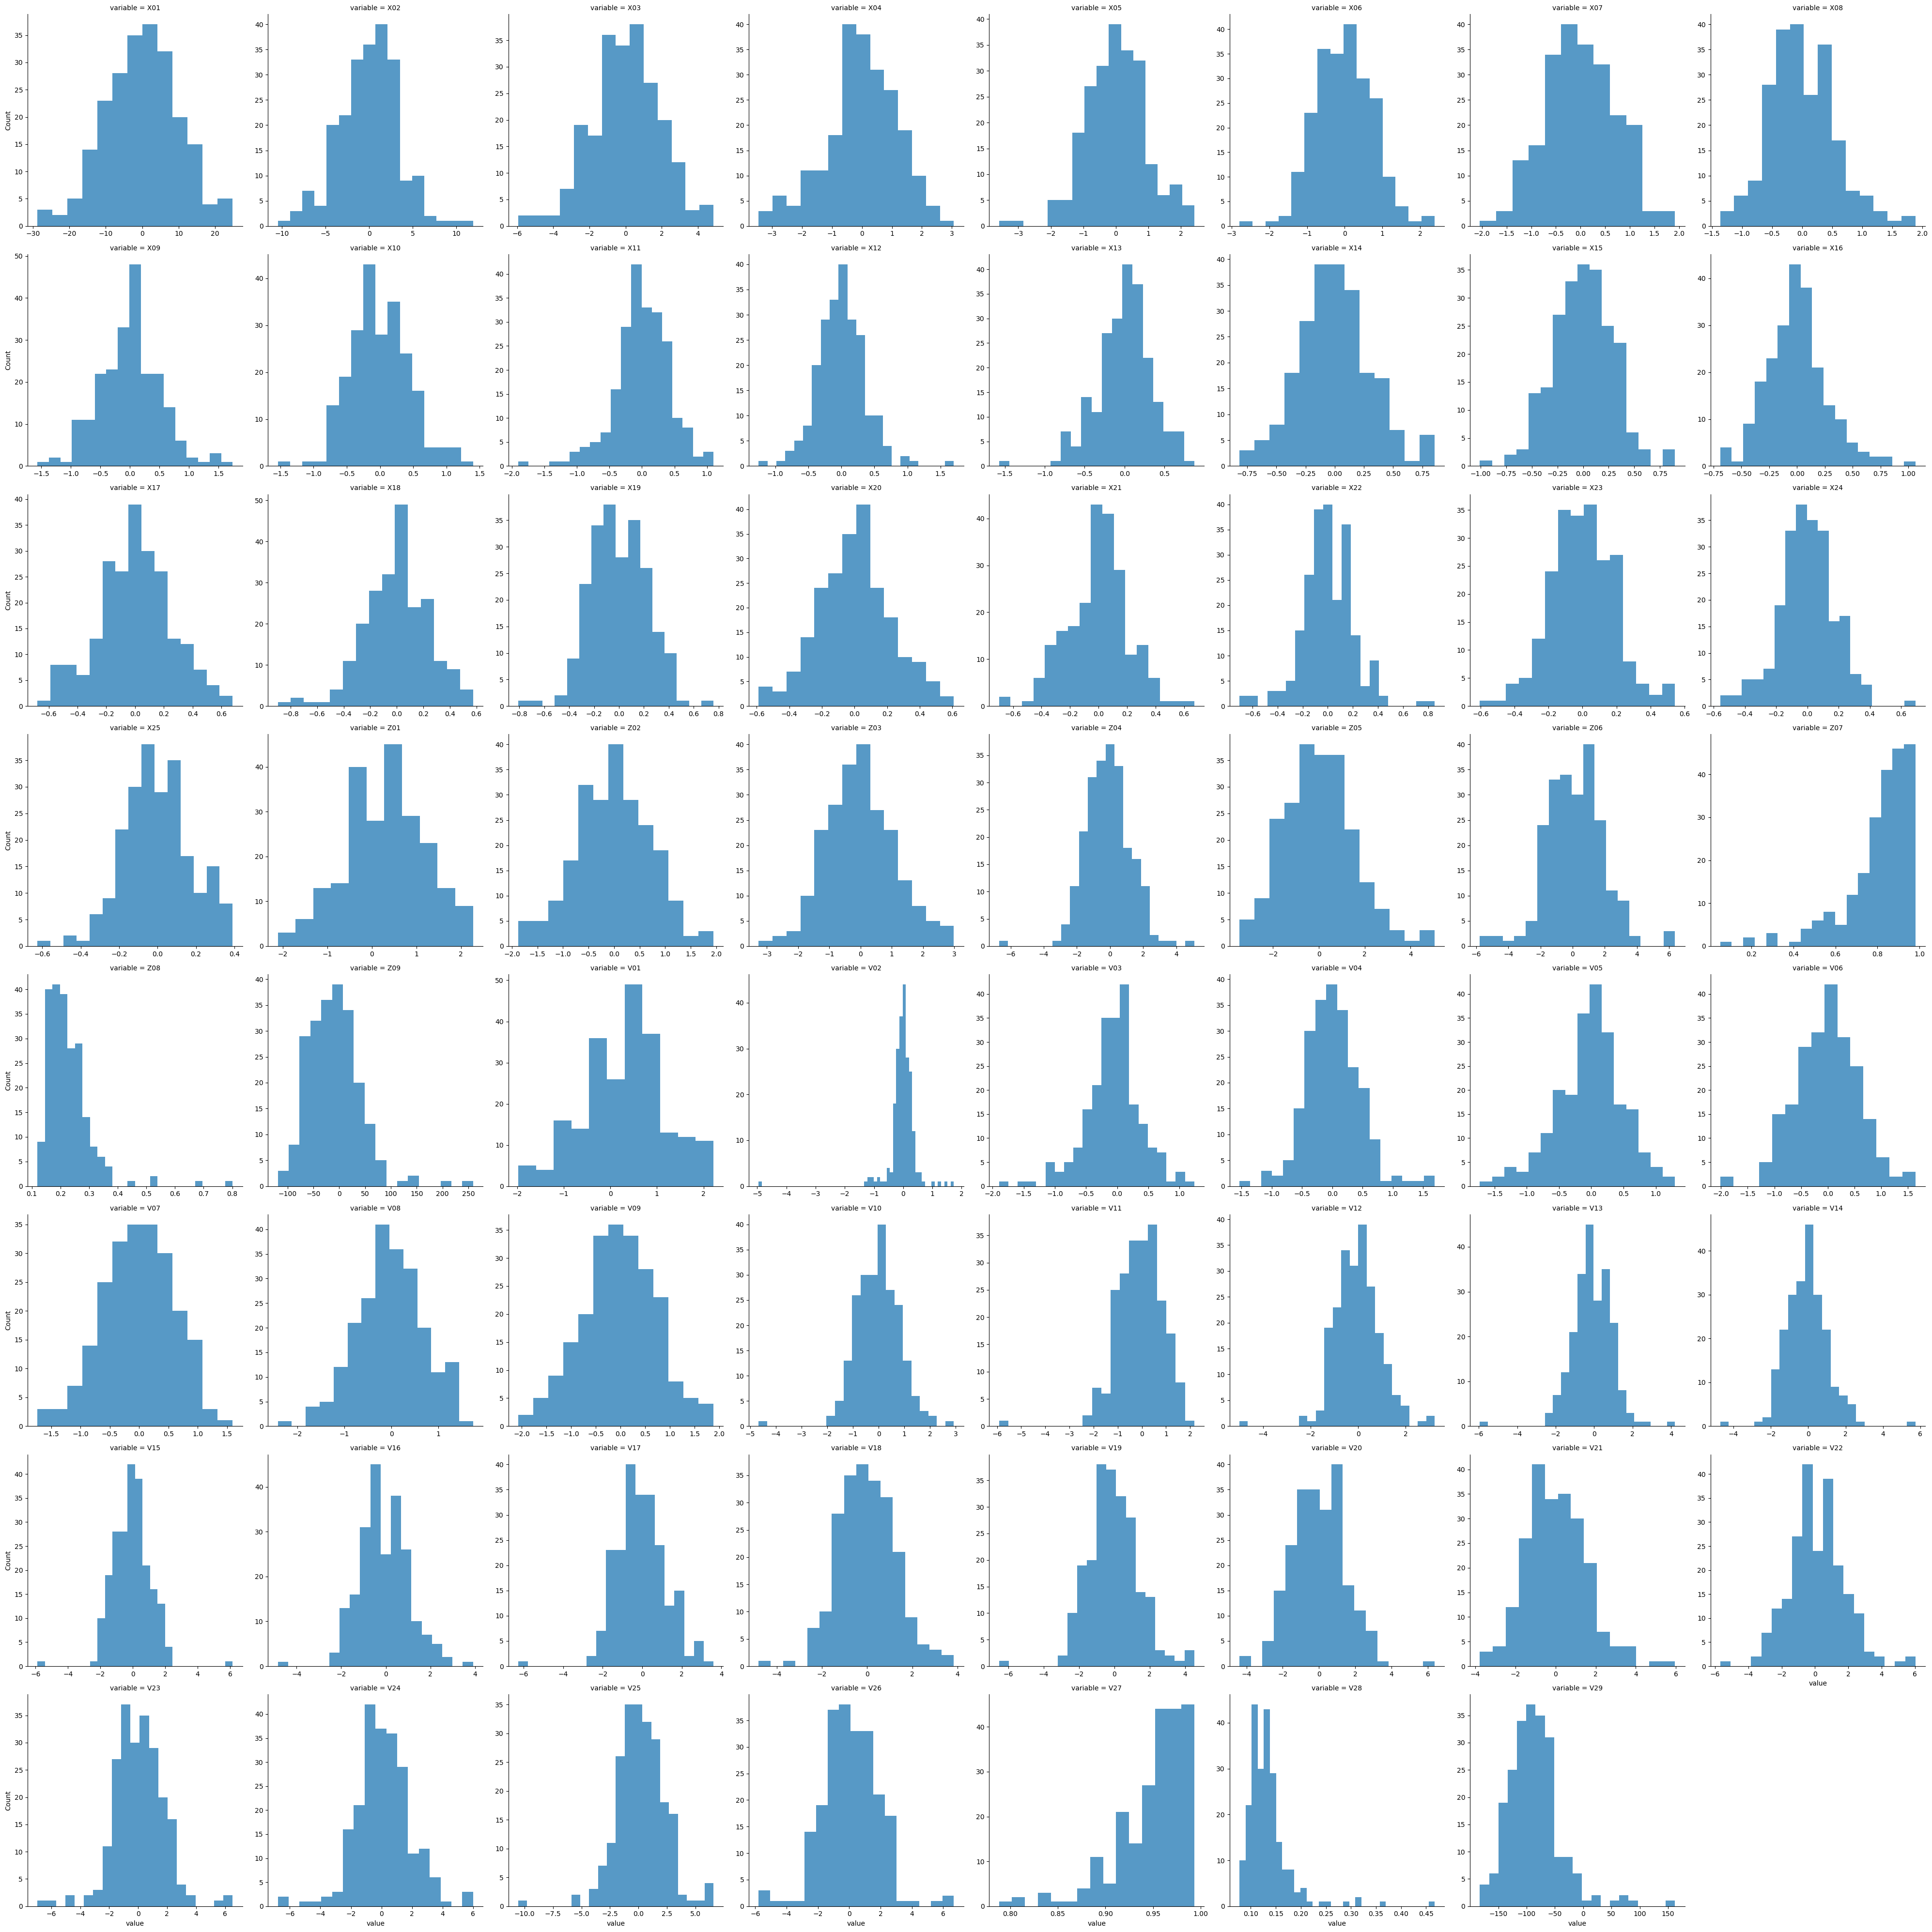

In [271]:
sns.displot(data=lf, kind='hist', x='value', col='variable', col_wrap=8,
            common_bins=False, common_norm=False,
            facet_kws={'sharex':False, 'sharey': False})

plt.show()

Definitely there are symmetric variables like X01, X02, X09, X12, Z02, Z04, V02, V04, V06, V07 etc.

Some are not e.g., X10, X19, X22 are bimodal, Z07 is left-skewed, Z08 is right skewed.

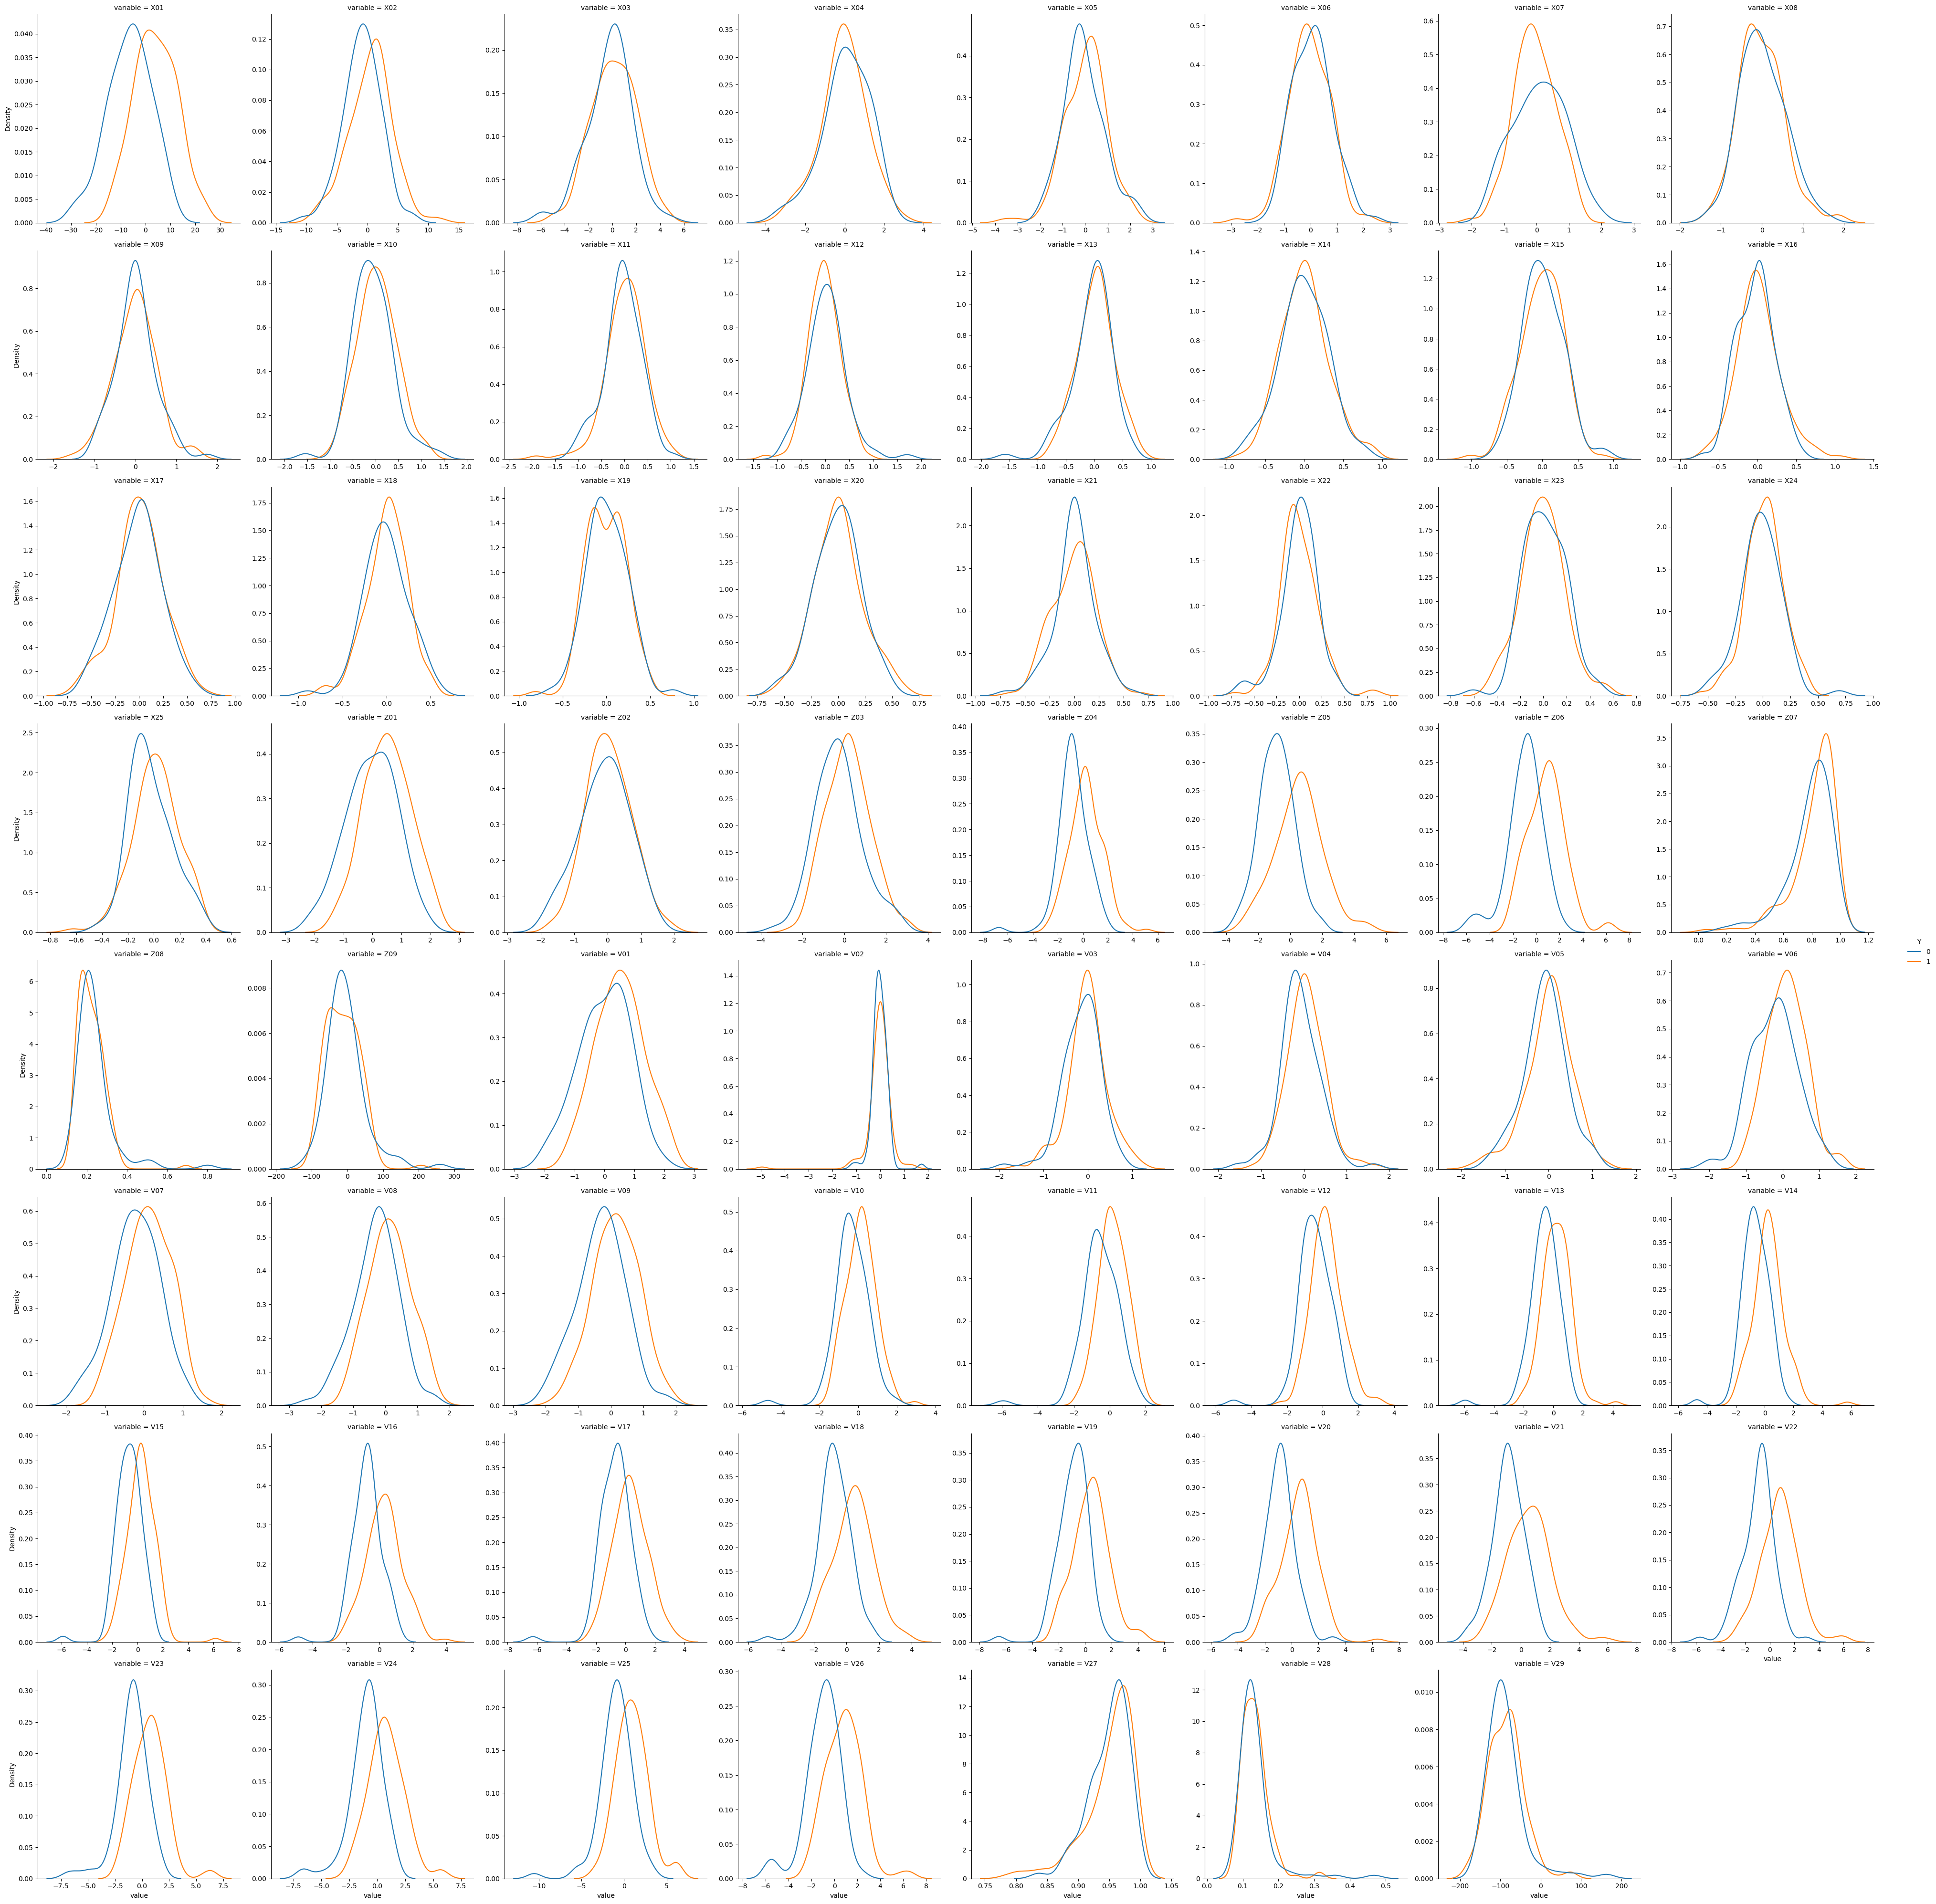

In [272]:
sns.displot(data=lf, kind='kde', x='value', col='variable', col_wrap=8,
            hue='Y', common_norm=False,
            facet_kws={'sharex':False, 'sharey': False})

plt.show()

Usually the kde plots are similar accross the categories but in some cases e.g., X19 `Y=1` is bimodal but `Y=0` is unimodal. In V and Z variable `Y=1` has more concentration to the right of `Y=0`.

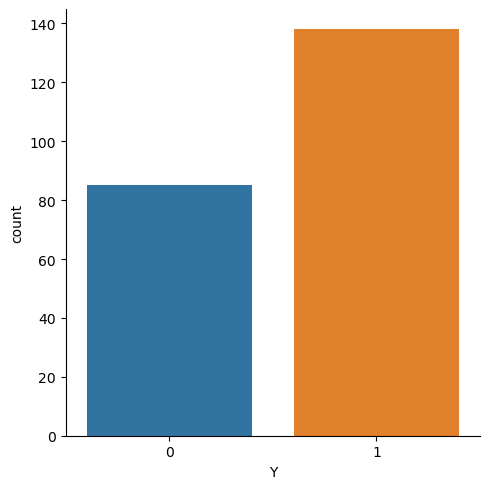

In [274]:
sns.catplot(data=df, kind='count', x='Y')

plt.show()

In [275]:
df_part_features = df[['X01','X02','Z01','Z02', 'V01', 'V02','Y' ]].copy()
df_part_features.melt(ignore_index=False)
lf_part = df_part_features.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['rowid', 'Y'])

In [276]:
lf_part

rowid  Y variable      value
0         0  1      X01  -2.907070
1         1  1      X01  -4.608052
2         2  1      X01   4.338816
3         3  0      X01  -1.835062
4         4  1      X01  13.990969
...     ... ..      ...        ...
1333    218  0      V02   0.046036
1334    219  1      V02   0.168402
1335    220  1      V02  -0.041844
1336    221  1      V02  -0.208668
1337    222  1      V02  -0.080534

[1338 rows x 4 columns]

In [277]:
df_clean=df.dropna().copy()

In [278]:
df_clean['Y']=df_clean.Y.astype('category')

In [279]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X01     223 non-null    float64 
 1   X02     223 non-null    float64 
 2   X03     223 non-null    float64 
 3   X04     223 non-null    float64 
 4   X05     223 non-null    float64 
 5   X06     223 non-null    float64 
 6   X07     223 non-null    float64 
 7   X08     223 non-null    float64 
 8   X09     223 non-null    float64 
 9   X10     223 non-null    float64 
 10  X11     223 non-null    float64 
 11  X12     223 non-null    float64 
 12  X13     223 non-null    float64 
 13  X14     223 non-null    float64 
 14  X15     223 non-null    float64 
 15  X16     223 non-null    float64 
 16  X17     223 non-null    float64 
 17  X18     223 non-null    float64 
 18  X19     223 non-null    float64 
 19  X20     223 non-null    float64 
 20  X21     223 non-null    float64 
 21  X22     223 non-

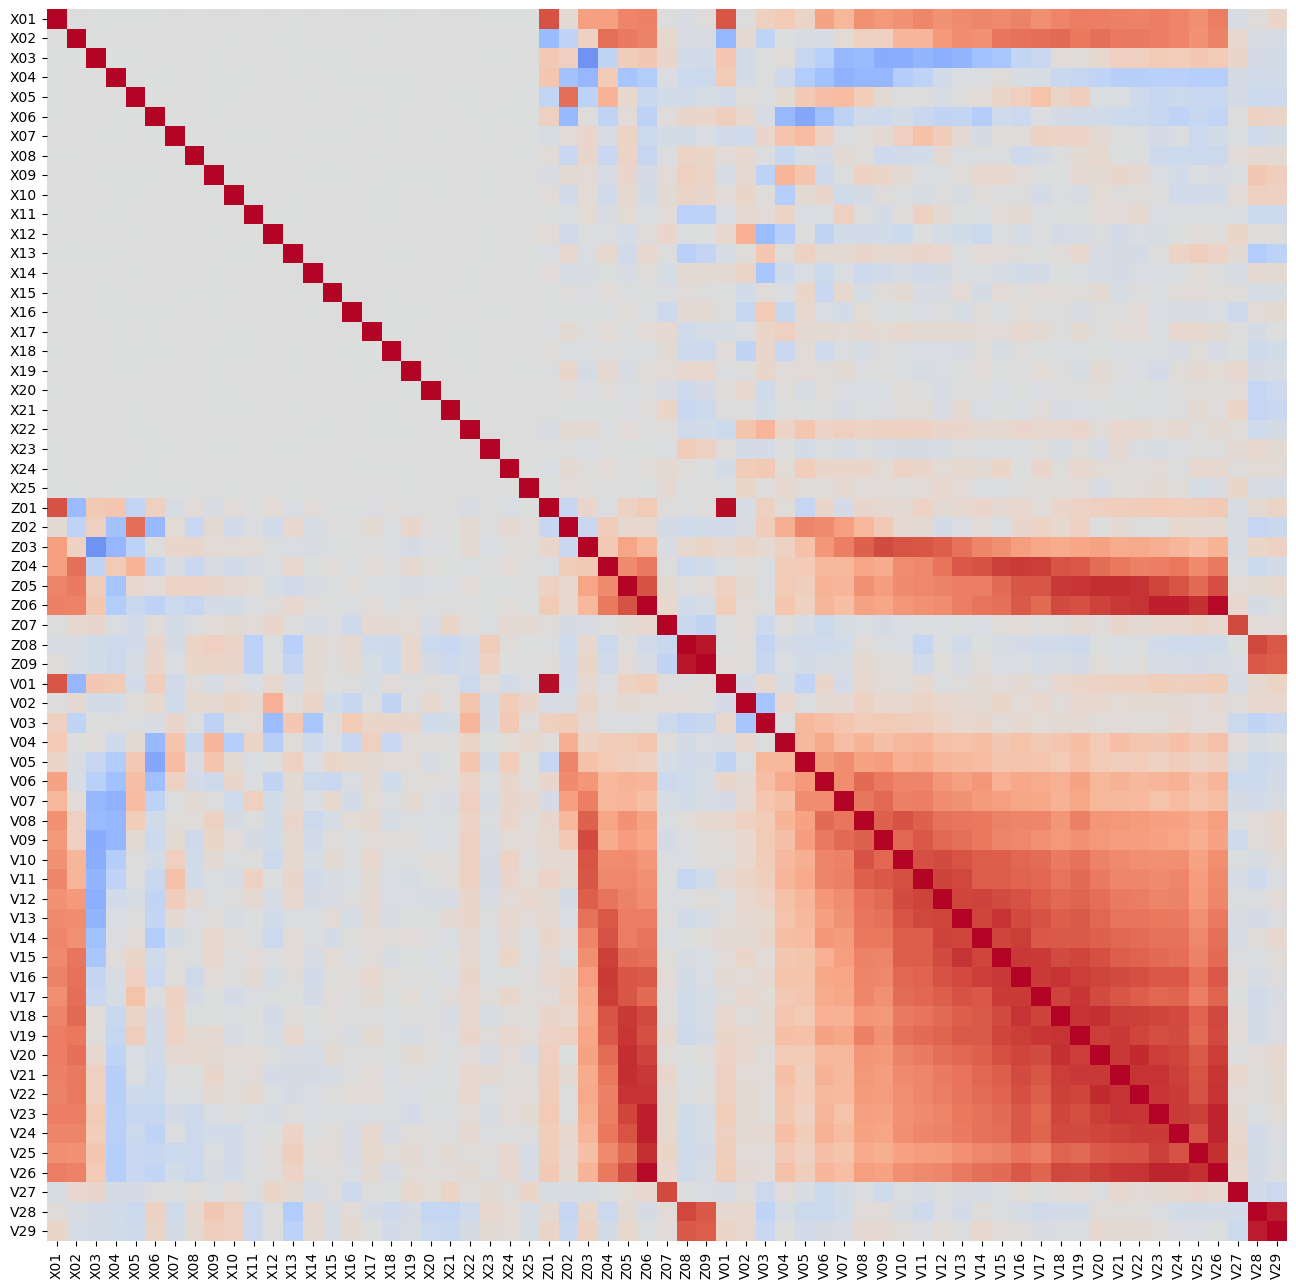

In [280]:
fig, ax = plt.subplots(figsize=(16,16))

sns.heatmap(data = df_clean.corr(numeric_only=True),
            vmin=-1, vmax=1, center=0,
            cmap='coolwarm', cbar=False,
            ax=ax)

plt.show()

In [281]:
groups=df_clean.Y.unique().tolist()
groups

[1, 0]

In [282]:
corr_per_group=df_clean.groupby('Y').corr()

In [283]:
corr_per_group

X01       X02       X03       X04       X05       X06       X07  \
Y                                                                             
0 X01  1.000000 -0.205255 -0.087020  0.181176 -0.106155  0.022670  0.203954   
  X02 -0.205255  1.000000 -0.000509  0.068710  0.028603  0.046520 -0.107031   
  X03 -0.087020 -0.000509  1.000000  0.101524  0.037781 -0.004955 -0.129379   
  X04  0.181176  0.068710  0.101524  1.000000 -0.021093  0.114410  0.116193   
  X05 -0.106155  0.028603  0.037781 -0.021093  1.000000  0.011185 -0.165383   
...         ...       ...       ...       ...       ...       ...       ...   
1 V25  0.449221  0.535932  0.207738 -0.319819 -0.171985 -0.109611 -0.093405   
  V26  0.509917  0.642393  0.209614 -0.329812 -0.177260 -0.125603 -0.028217   
  V27  0.020993  0.255429  0.191936 -0.078613 -0.123966 -0.051715  0.009738   
  V28  0.481938  0.099421 -0.056146 -0.048289 -0.303781  0.006422 -0.132591   
  V29  0.487228  0.037701 -0.036594 -0.055237 -0.241634  0.026896 -0.116197   

            X08       X09       X10  ...       V20       V21       V22  \
Y                                    ...                                 
0 X01 -0.116990 -0.117701 -0.052425  ...  0.489908  0.472819  0.402452   
  X02  0.021405 -0.192939 -0.014649  ...  0.624683  0.539181  0.587521   
  X03 -0.099406  0.025789 -0.081244  ... -0.003276  0.094116  0.134313   
  X04  0.093050  0.066907  0.004890  ... -0.064748 -0.138889 -0.228806   
  X05  0.146792  0.070581 -0.049404  ... -0.045776 -0.078500 -0.180840   
...         ...       ...       ...  ...       ...       ...       ...   
1 V25 -0.094394  0.120891 -0.064388  ...  0.728426  0.784733  0.757744   
  V26 -0.056534  0.093481 -0.102301  ...  0.857264  0.900553  0.880138   
  V27  0.008055 -0.026474  0.057121  ...  0.172014  0.282729  0.233793   
  V28  0.104939  0.089362 -0.041137  ...  0.359102  0.299891  0.337032   
  V29  0.061452  0.045616 -0.030766  ...  0.318734  0.264227  0.306602   

            V23       V24       V25       V26       V27       V28       V29  
Y                                                                            
0 X01  0.469191  0.434905  0.385855  0.496872 -0.214225 -0.457191 -0.407074  
  X02  0.554541  0.491096  0.469262  0.493617 -0.339179 -0.212051 -0.202974  
  X03  0.178055  0.048545  0.200277  0.143240 -0.088684 -0.077255 -0.133750  
  X04 -0.112803 -0.163159 -0.196220 -0.180789 -0.024765 -0.147766 -0.108528  
  X05 -0.218230 -0.173990 -0.193015 -0.213615  0.048804  0.070151  0.103119  
...         ...       ...       ...       ...       ...       ...       ...  
1 V25  0.860391  0.773741  1.000000  0.887672  0.301572  0.384675  0.362597  
  V26  0.942585  0.946392  0.887672  1.000000  0.298503  0.402619  0.366128  
  V27  0.286658  0.300219  0.301572  0.298503  1.000000 -0.156757 -0.175995  
  V28  0.430226  0.338856  0.384675  0.402619 -0.156757  1.000000  0.961420  
  V29  0.374609  0.306797  0.362597  0.366128 -0.175995  0.961420  1.000000  

[126 rows x 63 columns]

Lets study correlation in groups now:

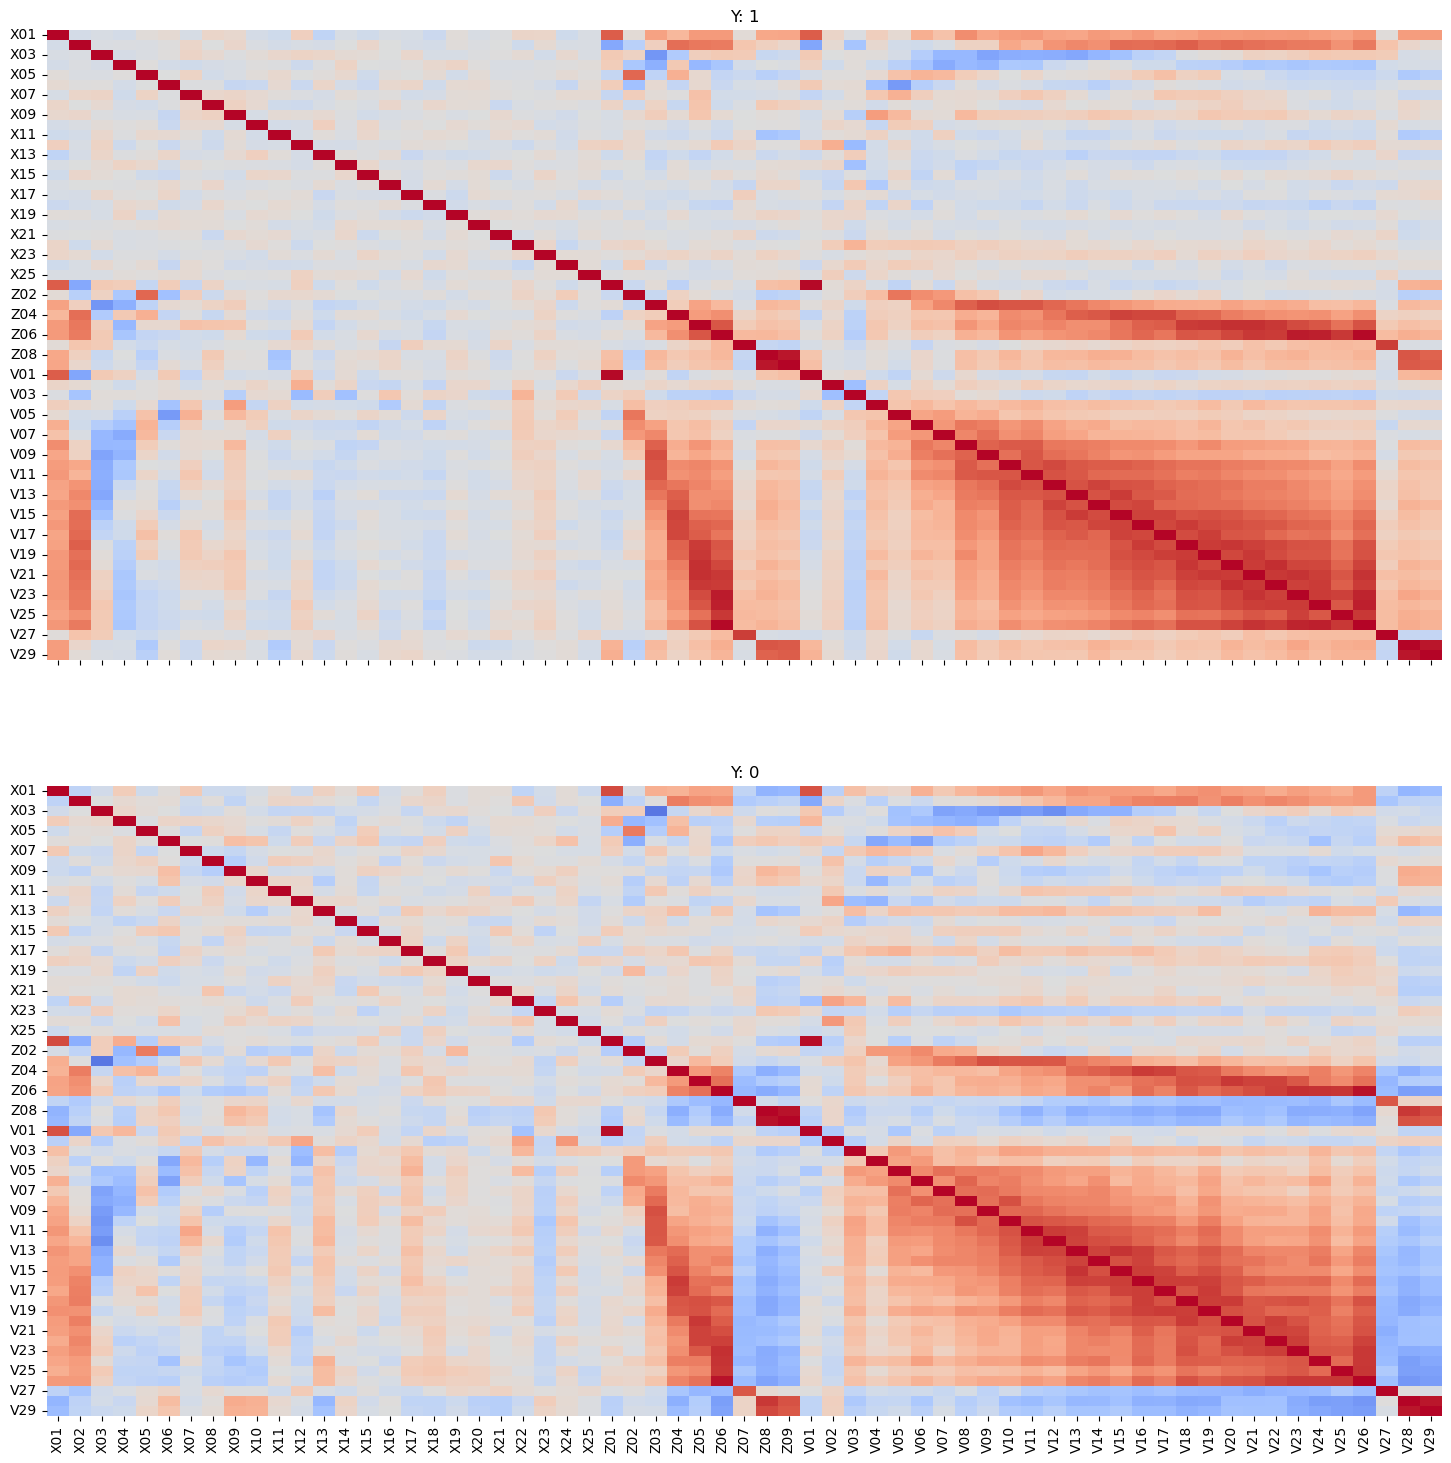

In [284]:
fig, axs = plt.subplots(len(groups),1, figsize=(18, 18), sharex=True, sharey=True )

for ix in range(len(groups)):
    sns.heatmap( data = corr_per_group.loc[ groups[ ix ] ],
                 vmin=-1, vmax=1, center = 0,
                 cmap='coolwarm', cbar=False,
                 ax=axs[ix] )
    
    axs[ ix ].set_title('Y: %s' % groups[ ix ] )

plt.show()

Impossible to make minute observation but we can see that there are some strong possitive association in consecutive in V and negative in V27,V28,V29 with most of the other Vs.

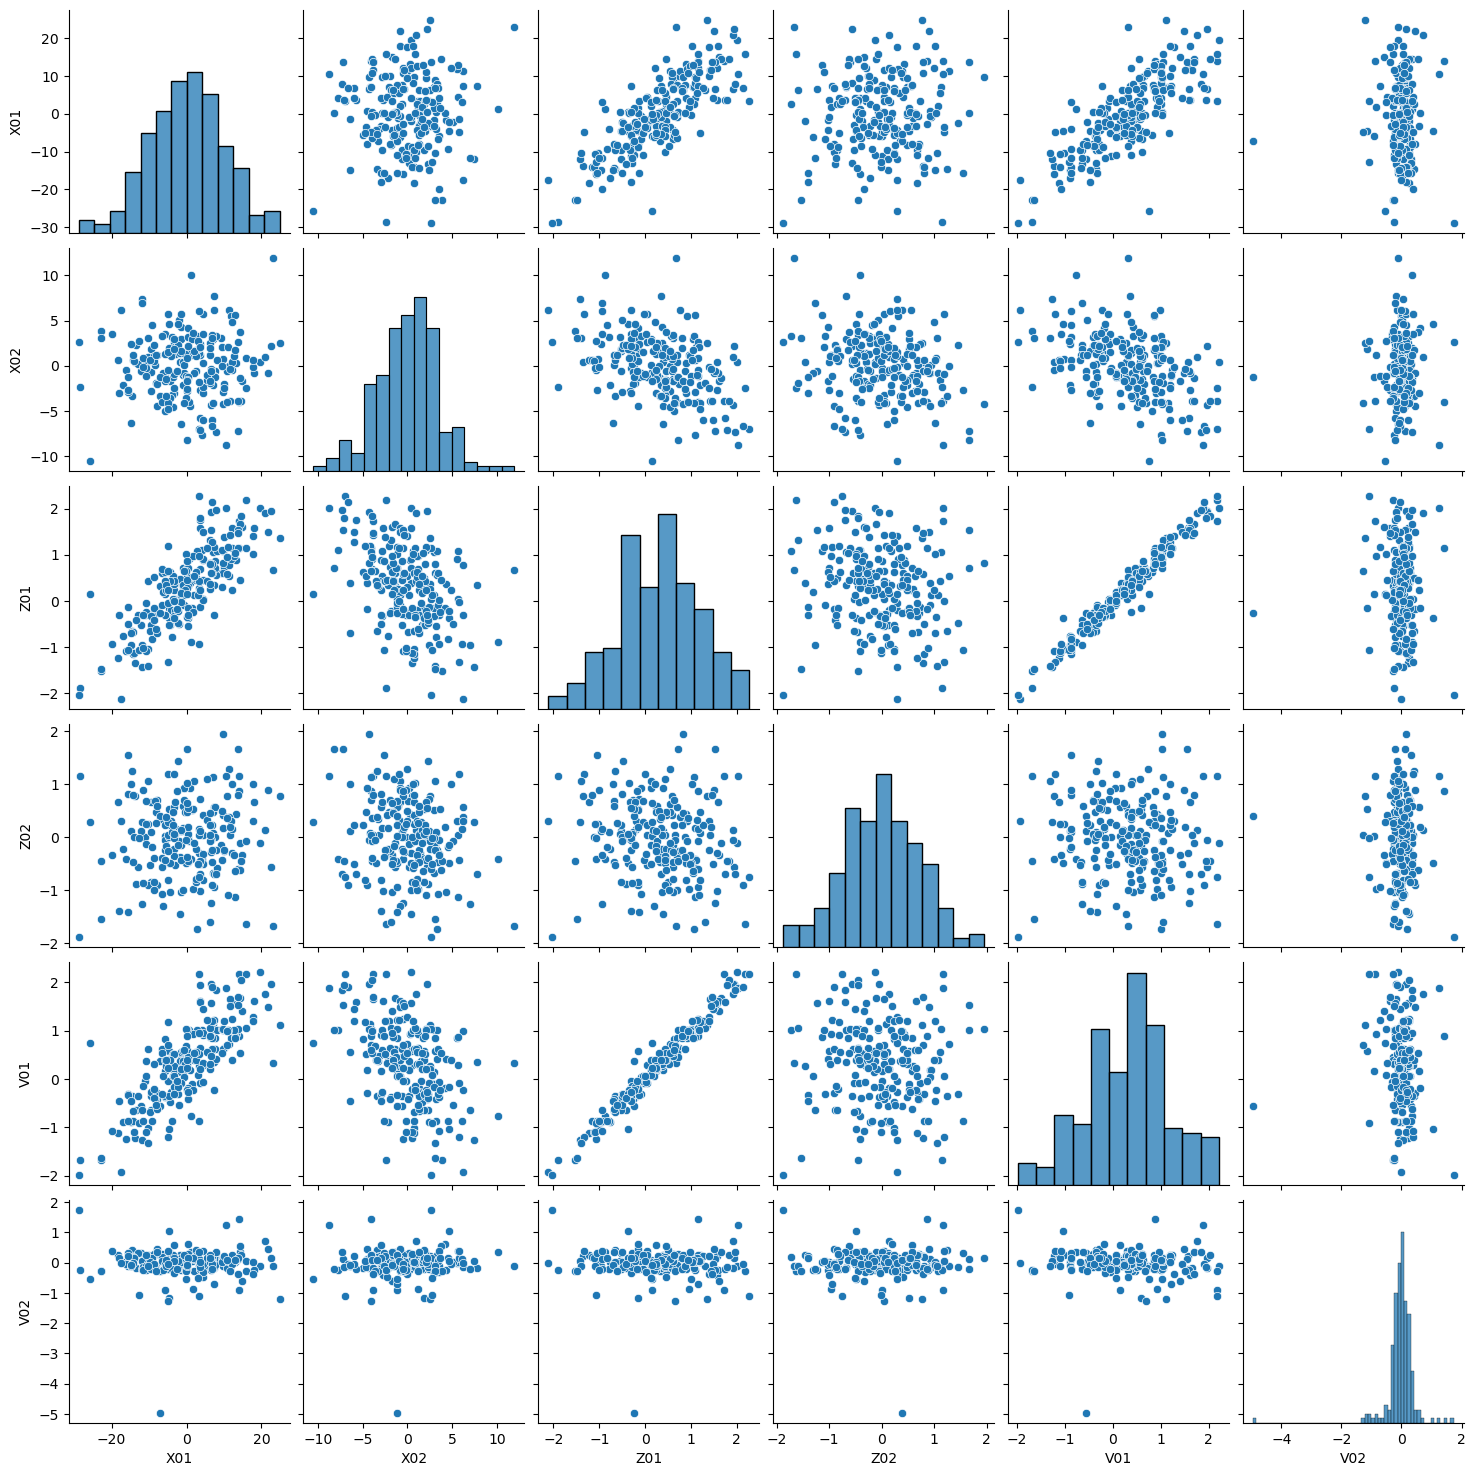

In [285]:
df_part_features1 = df[['X01','X02','Z01','Z02', 'V01', 'V02' ]].copy()
sns.pairplot(data=df_part_features1, diag_kws={'common_norm': False} )

plt.show()

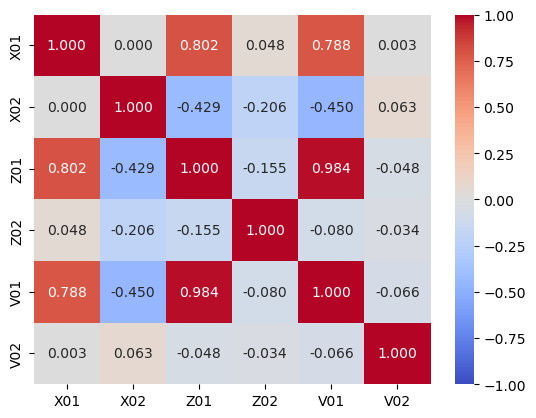

In [286]:
fig, ax = plt.subplots()

sns.heatmap(data = df_part_features1.corr(numeric_only=True),
            vmin=-1, vmax=1, center = 0, fmt='.3f',
            cmap='coolwarm',
            annot=True, annot_kws={'size': 10},
            ax=ax)

plt.show()

There is a good linear relationship between (X01, Z01),(X01, V01), (Z01, V01) and almost no relationship between (X01,V02).

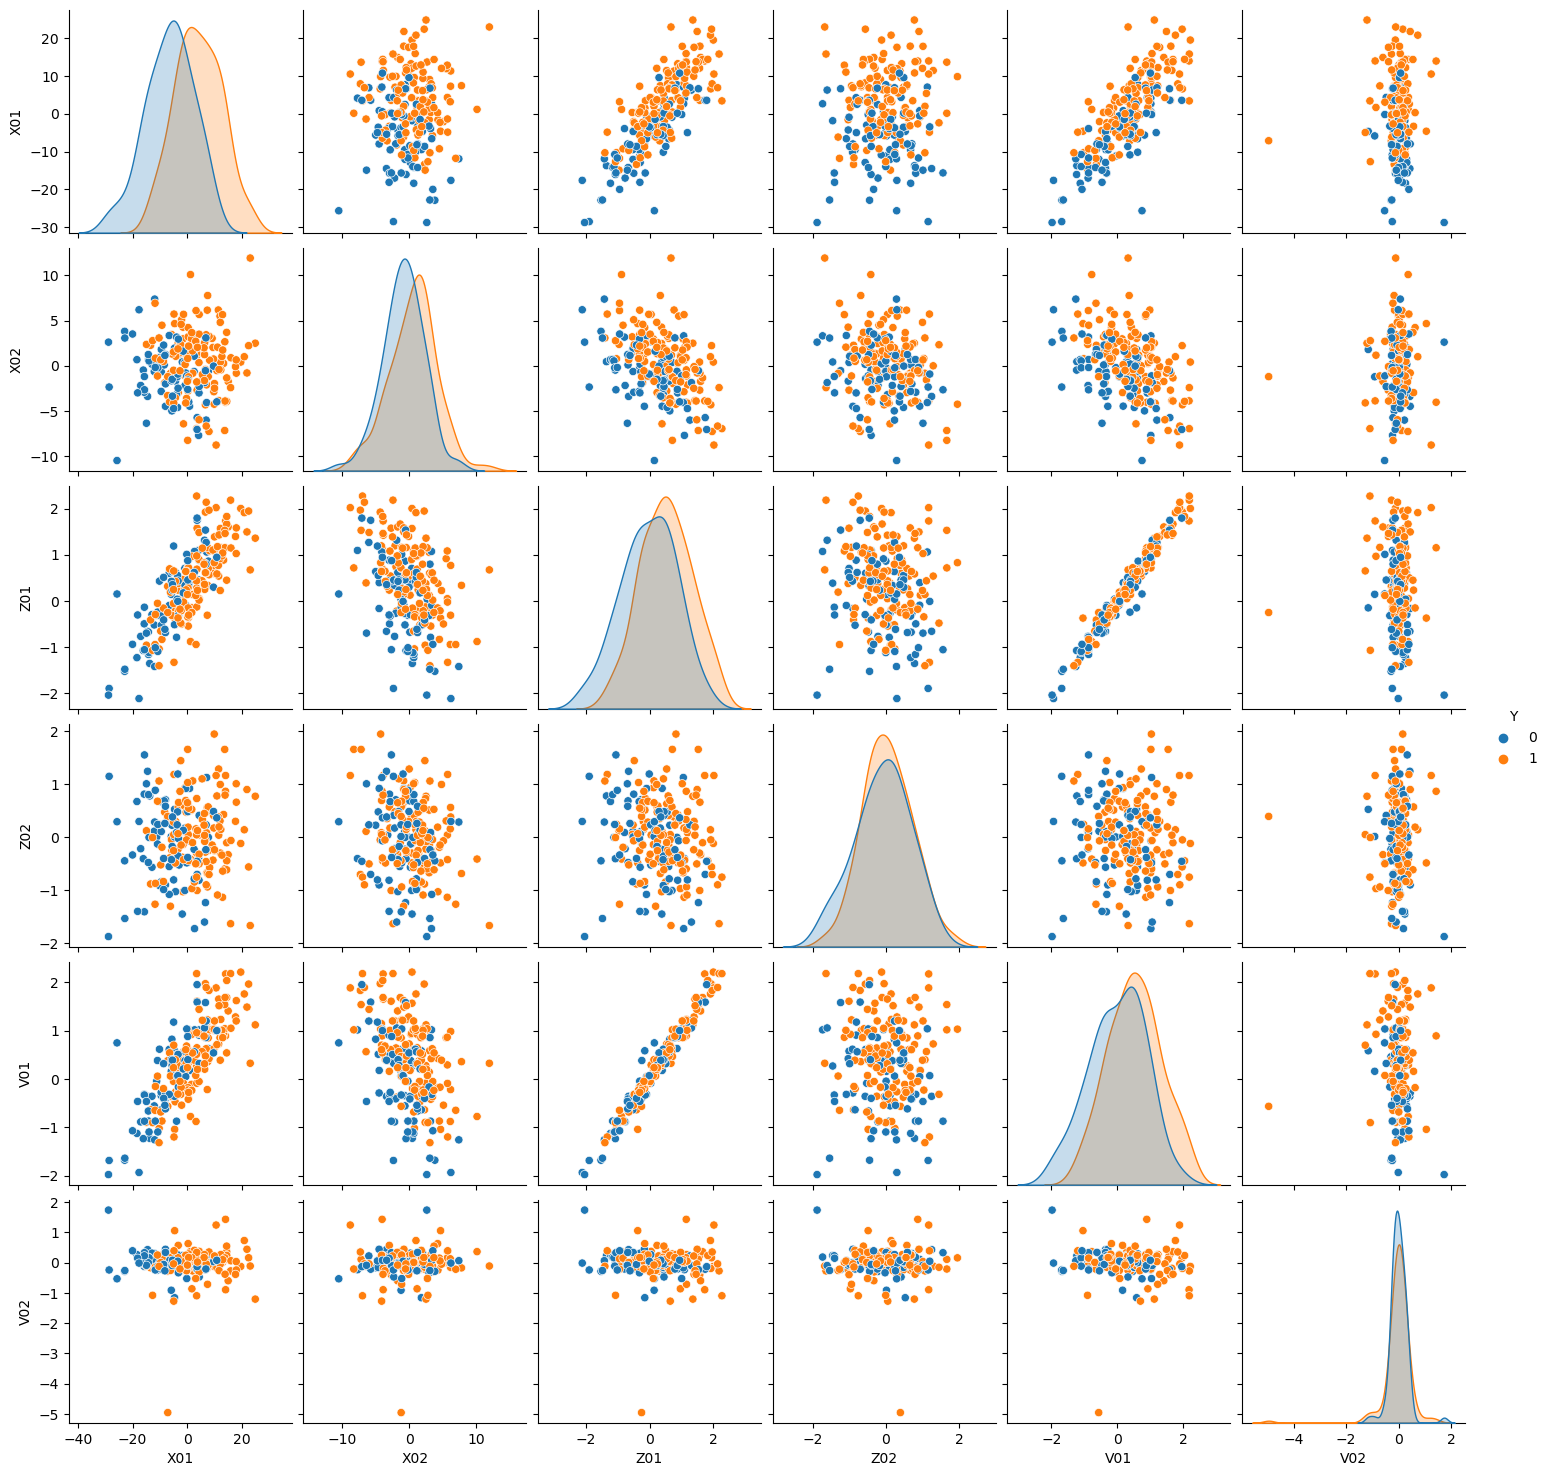

In [287]:
sns.pairplot(data=df_part_features, hue='Y', diag_kws={'common_norm': False})

plt.show()

I can see that `Y=1` is more variable in relationship between continuous-continuous variables than `Y=0`. We can also observe another thing that it is difficult to isolate the data with catogories of `Y` so far. It should be evident because originally we have 63 feature variables. Later on we will come back to this problem when we will do PCA analysis.

In [288]:
df_clean.shape

(223, 64)

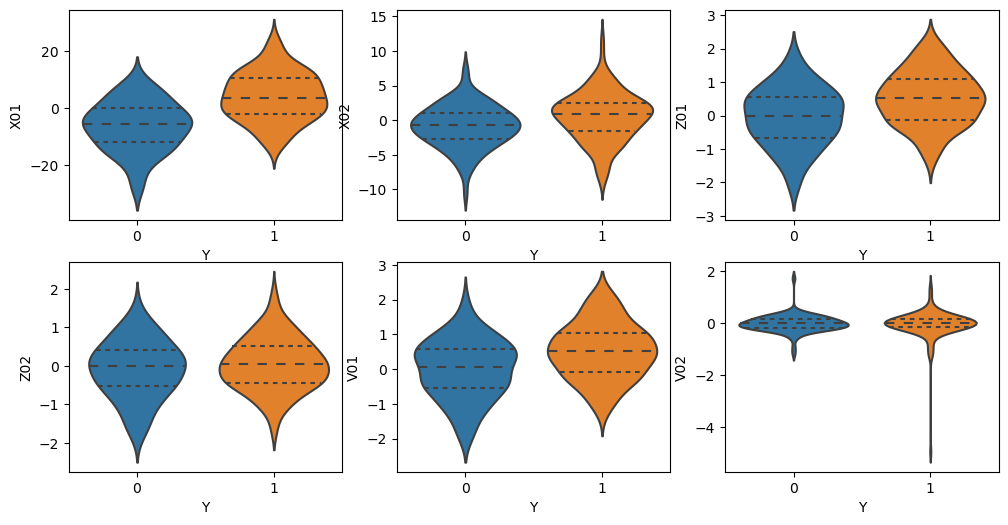

In [289]:
fig, axs = plt.subplots(2,3,figsize=(12,6))

sns.violinplot(data=df_clean, x='Y', y='X01', inner='quartile', ax=axs[0,0])
sns.violinplot(data=df_clean, x='Y', y='X02', inner='quartile', ax=axs[0,1])
sns.violinplot(data=df_clean, x='Y', y='Z01', inner='quartile', ax=axs[0,2])

sns.violinplot(data=df_clean, x='Y', y='Z02', inner='quartile', ax=axs[1,0])
sns.violinplot(data=df_clean, x='Y', y='V01', inner='quartile', ax=axs[1,1])
sns.violinplot(data=df_clean, x='Y', y='V02', inner='quartile', ax=axs[1,2])


plt.show()

In [290]:
lf_part= df.reset_index().\
    rename(columns={'index':'rowid'}).\
    melt(id_vars=['rowid', 'Y'], 
    value_vars=['X01','X02','Z01','Z02', 'V01', 'V02']).copy()

In [291]:
lf_part.columns

Index(['rowid', 'Y', 'variable', 'value'], dtype='object')

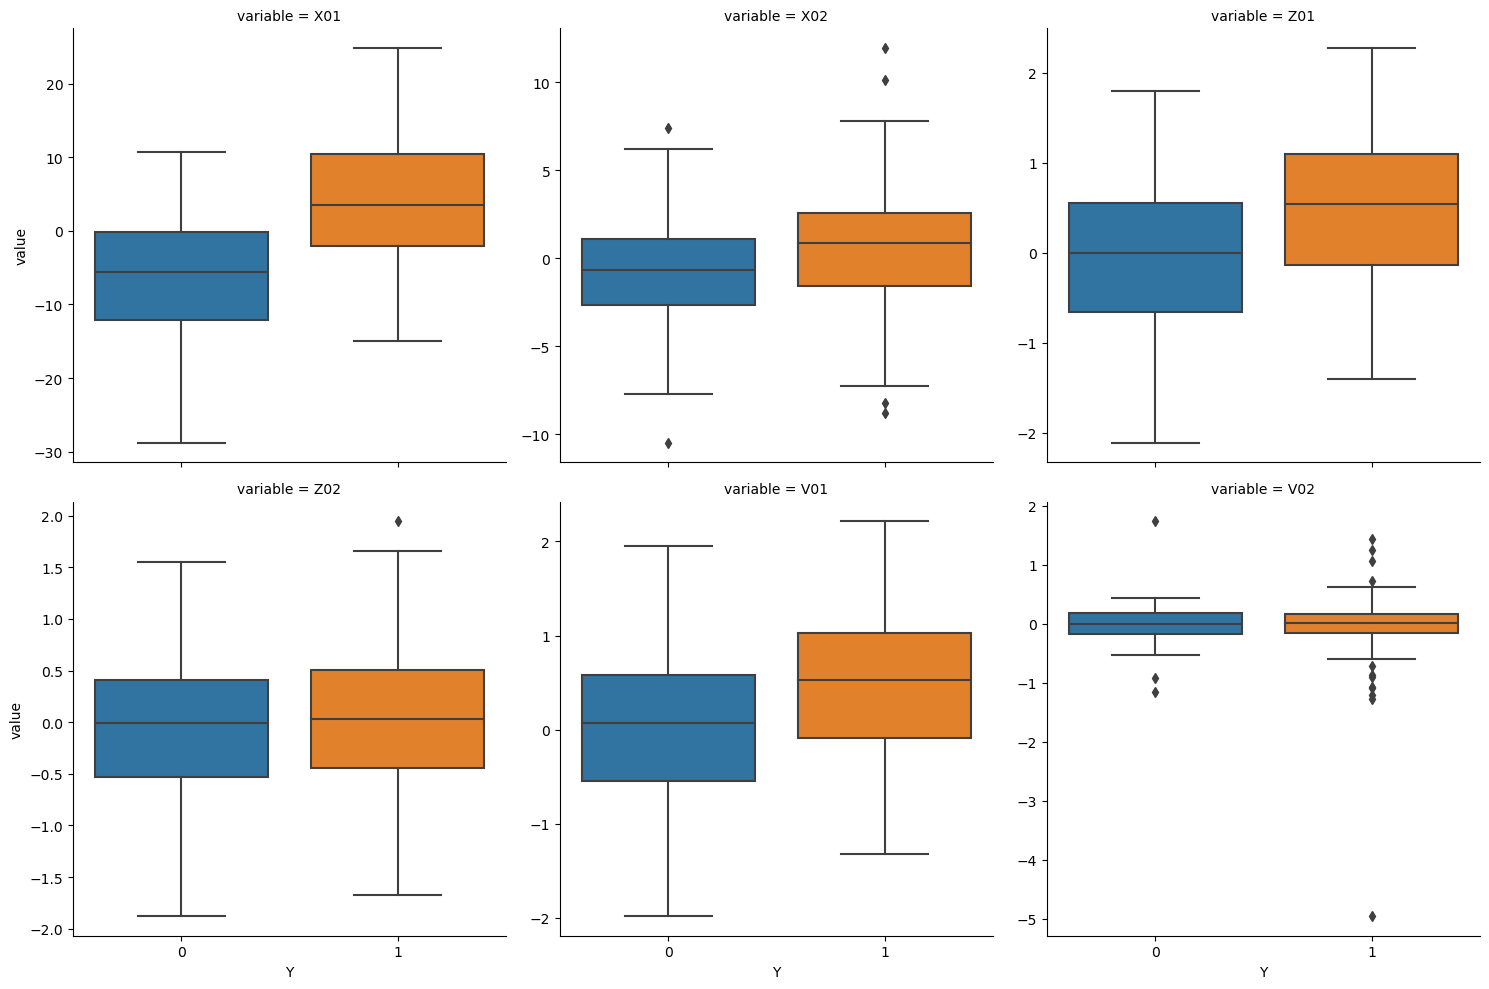

In [292]:
sns.catplot(data=lf_part, x='Y', y='value', col='variable', kind='box',
            col_wrap=3, sharey=False)

plt.show()

In [293]:
corr_per_group1 = df_clean.loc[ :, ['X01','X02','Z01','Z02', 'V01', 'V02','Y']].groupby(['Y']).corr()

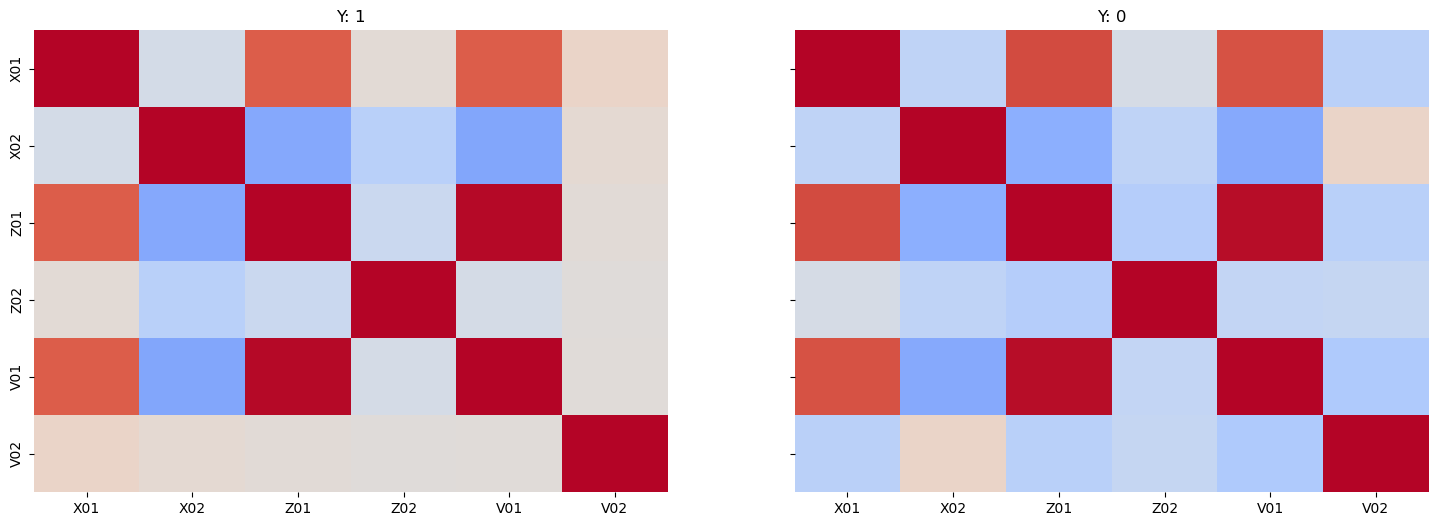

In [294]:
fig, axs = plt.subplots(1,len(groups), figsize=(18, 6), sharex=True, sharey=True )

for ix in range(len(groups)):
    sns.heatmap( data = corr_per_group1.loc[ groups[ ix ] ],
                 vmin=-1, vmax=1, center = 0,
                 cmap='coolwarm', cbar=False,
                 ax=axs[ix] )
    
    axs[ ix ].set_title('Y: %s' % groups[ ix ] )

plt.show()

#### Cluster analysis

Now we know that our data has two response `Y=0` and `Y=1`. We will ignore that and check 3 clusters or so and also show the a graph to check optimal clusters. Still we should eventually start with 2 clusters and we will just use one variable.

Although we have seen before that our data has no missing value. We will still do it to maintain a good practice.

In [295]:
from sklearn.cluster import KMeans

In [296]:
df_clean_copy=df.copy()

df_clean_copy_features = df_clean_copy.drop(columns=['Y'])

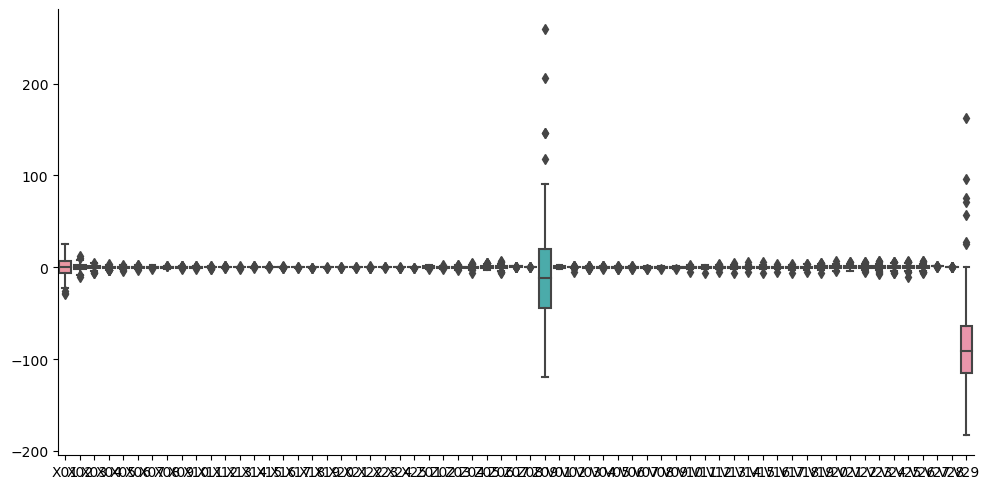

In [297]:
sns.catplot(data = df_clean_copy_features, kind='box', aspect=2)

plt.show()

In [298]:
from sklearn.preprocessing import StandardScaler

Xpoli= StandardScaler().fit_transform(df_clean_copy_features)

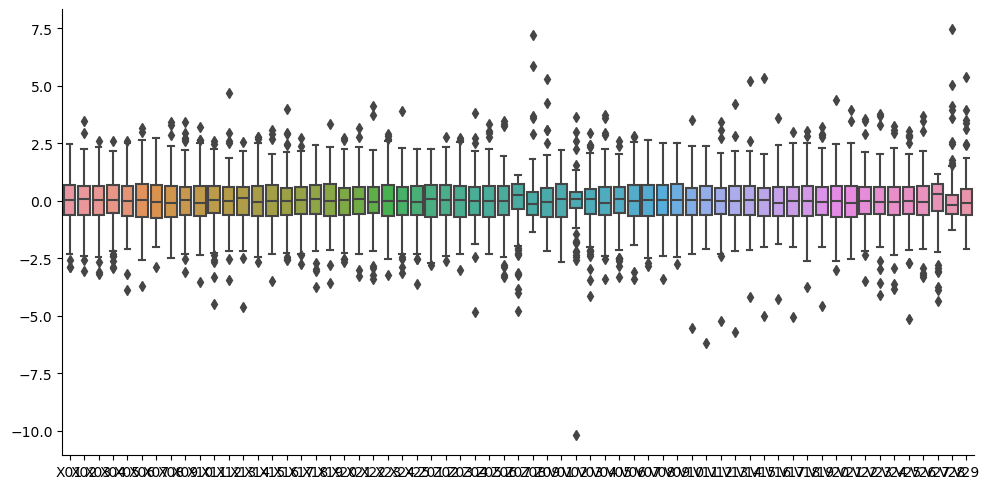

In [299]:
sns.catplot(data = pd.DataFrame(Xpoli, columns=df_clean_copy_features.columns), kind='box', aspect=2)

plt.show()

We have removed the scale effect now. No missing rows. KMeans NOW!!

In [300]:
clusters_2 = KMeans(n_clusters=2, random_state=121, n_init=25, max_iter=500).fit_predict( Xpoli )

In [301]:
df_clean_copy['k2']=pd.Series(clusters_2, index=df_clean_copy.index).astype('category')

In [302]:
df_clean_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X01     223 non-null    float64 
 1   X02     223 non-null    float64 
 2   X03     223 non-null    float64 
 3   X04     223 non-null    float64 
 4   X05     223 non-null    float64 
 5   X06     223 non-null    float64 
 6   X07     223 non-null    float64 
 7   X08     223 non-null    float64 
 8   X09     223 non-null    float64 
 9   X10     223 non-null    float64 
 10  X11     223 non-null    float64 
 11  X12     223 non-null    float64 
 12  X13     223 non-null    float64 
 13  X14     223 non-null    float64 
 14  X15     223 non-null    float64 
 15  X16     223 non-null    float64 
 16  X17     223 non-null    float64 
 17  X18     223 non-null    float64 
 18  X19     223 non-null    float64 
 19  X20     223 non-null    float64 
 20  X21     223 non-null    float64 
 21  X22     223 non-

In [303]:
df_clean_copy.k2.value_counts()

1    119
0    104
Name: k2, dtype: int64

In [304]:
df.Y.value_counts()

1    138
0     85
Name: Y, dtype: int64

Clearly there are some mismatch. Lets calculate the extent of mismatch.

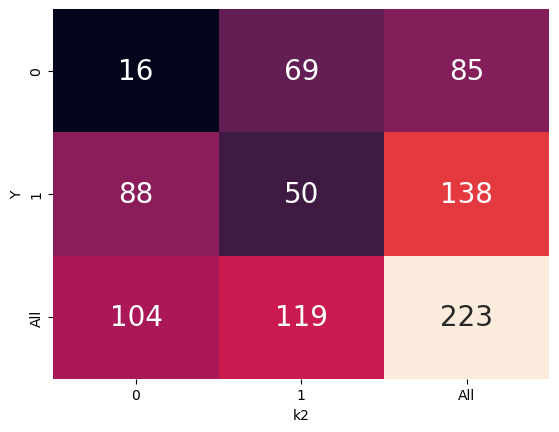

In [305]:
fig, ax = plt.subplots()

sns.heatmap(data = pd.crosstab( df_clean_copy.Y, df_clean_copy.k2, margins=True),
            annot=True, annot_kws={'fontsize': 20}, fmt='g',
            cbar=False,
            ax=ax )

plt.show()

Out of 104 rows corresponding to `k2=0`, 88 of them falls into `Y=1` with Prob(Y=1|k2=0)=88/106 and Hence we can say if a machine falls under the category `k2=0` there is a high probability that it is going to fail soon.

Lets see the optimal number of cluster by KMeans here,

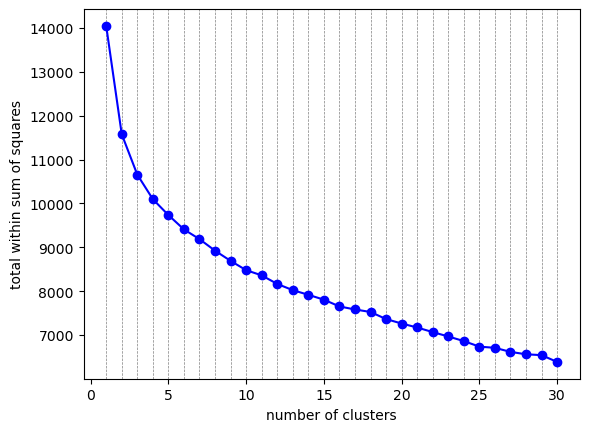

In [306]:
opt_clus=[]

K = range(1, 31)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500)
    km = km.fit(Xpoli)
    
    opt_clus.append(km.inertia_)
    
fig, ax =plt.subplots()

for x_value in range(1, max(K) + 1):
    ax.axvline(x=x_value, color='gray', linewidth=0.5, linestyle='--')
    
ax.plot(K, opt_clus, 'bo-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

#ax.set_ylim(0, max(opt_clus) + 10000)  # Adjust the upper limit as needed

plt.show()

I can see an elbow bend at cluster=2 but I can also see another bend at 4. Lets do with cluster=4.

In [307]:
clusters_4 = KMeans(n_clusters=4, random_state=121, n_init=25, max_iter=500).fit_predict( Xpoli )

In [308]:
df_clean_copy['k4']=pd.Series(clusters_4, index=df_clean_copy.index).astype('category')

In [309]:
df_clean_copy.k4.value_counts()

3    103
1     63
2     52
0      5
Name: k4, dtype: int64

Now lets draw the pair plot with hue facets for both cluster=2 and cluster=4. Here we can't use the humongous 63 feature variables. Hence we will draw via part features 'X01','X02','Z01','Z02', 'V01', 'V02','Y' that we selected before.

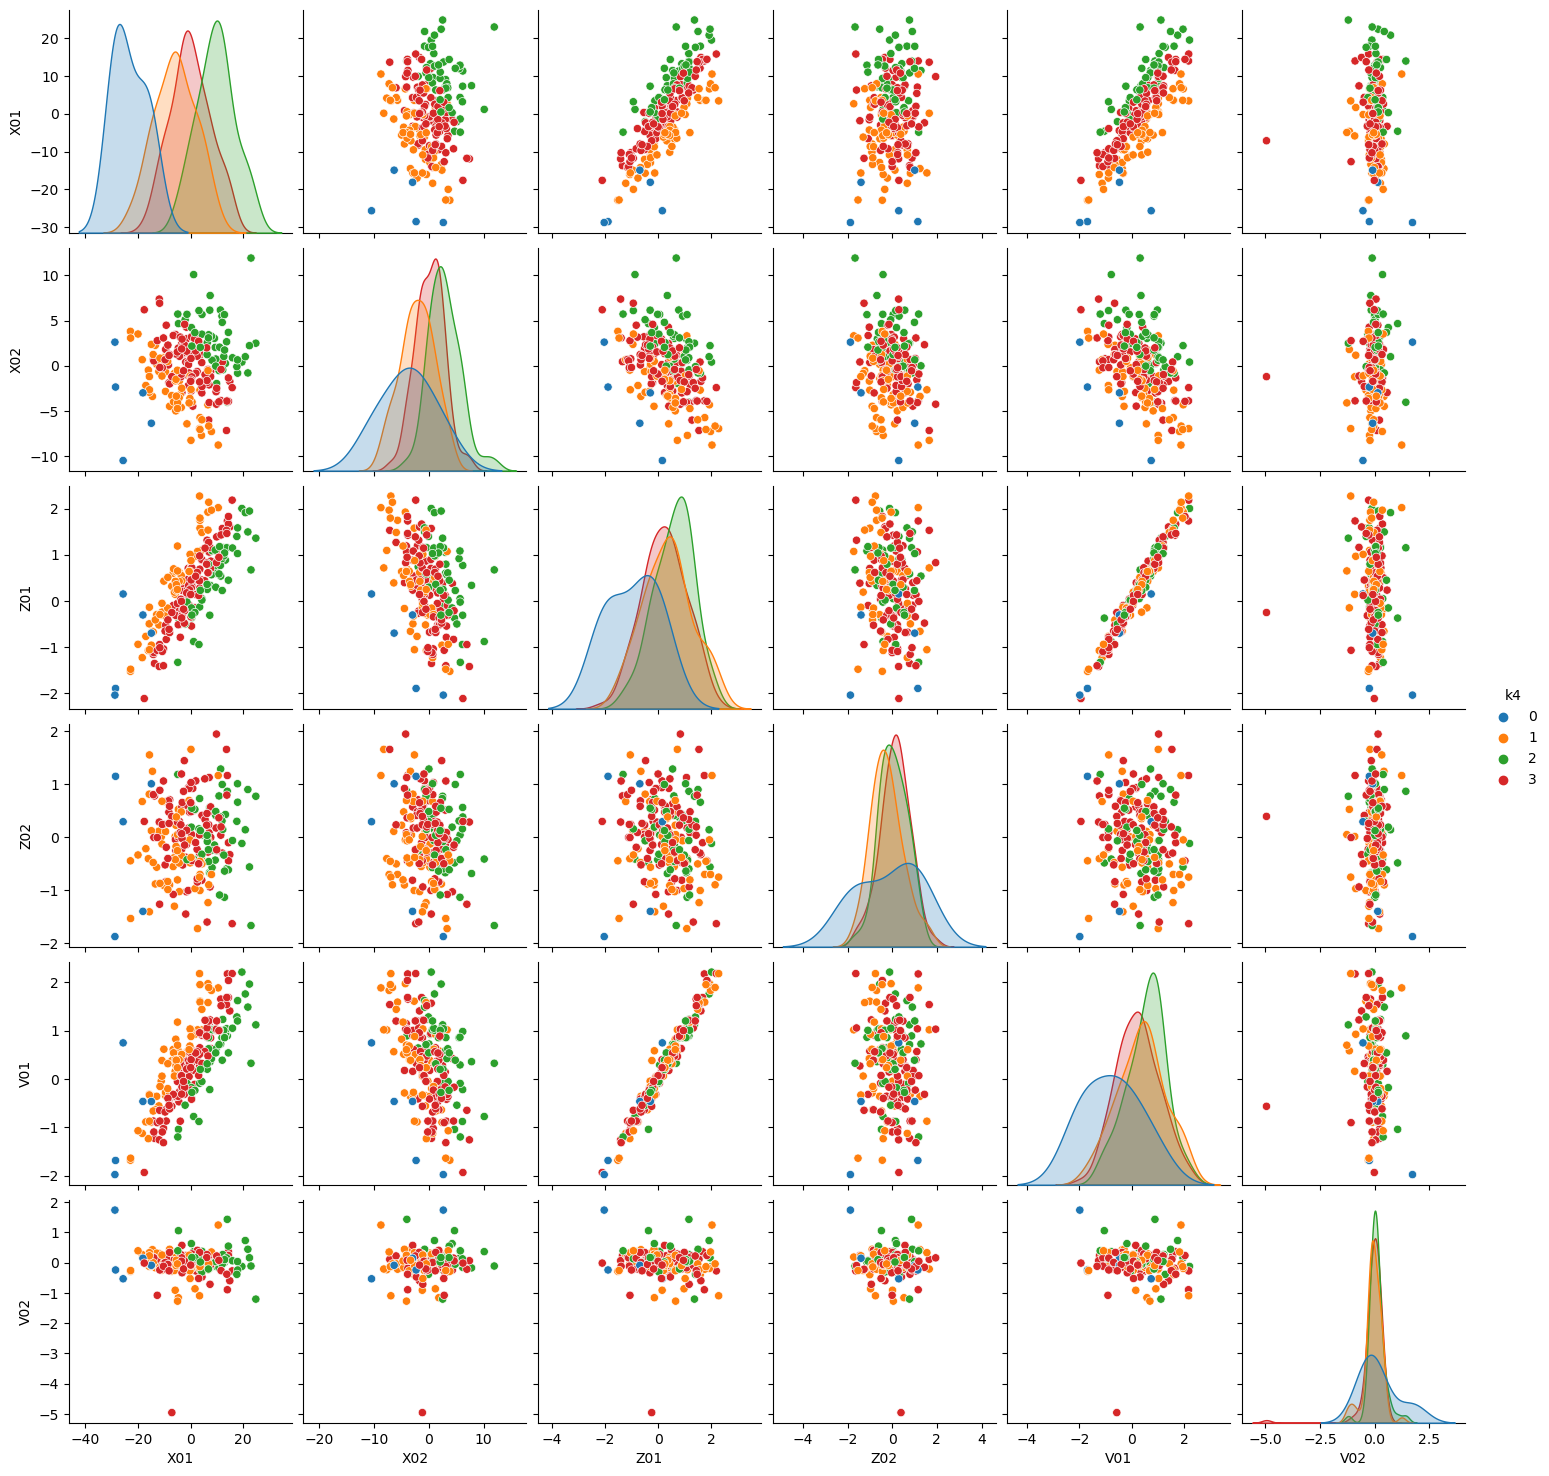

In [310]:
df_clean_copy_part_features = df_clean_copy[['X01','X02','Z01','Z02', 'V01', 'V02','k4' ]].copy()
sns.pairplot(data=df_clean_copy_part_features, hue='k4',diag_kws={'common_norm': False})

plt.show()

I don't see a good sepration with 4 clusters here. Although the Kmeans might seperate the data well because we are seeing the data in 2D with the effect of 2 features, we see this problem.

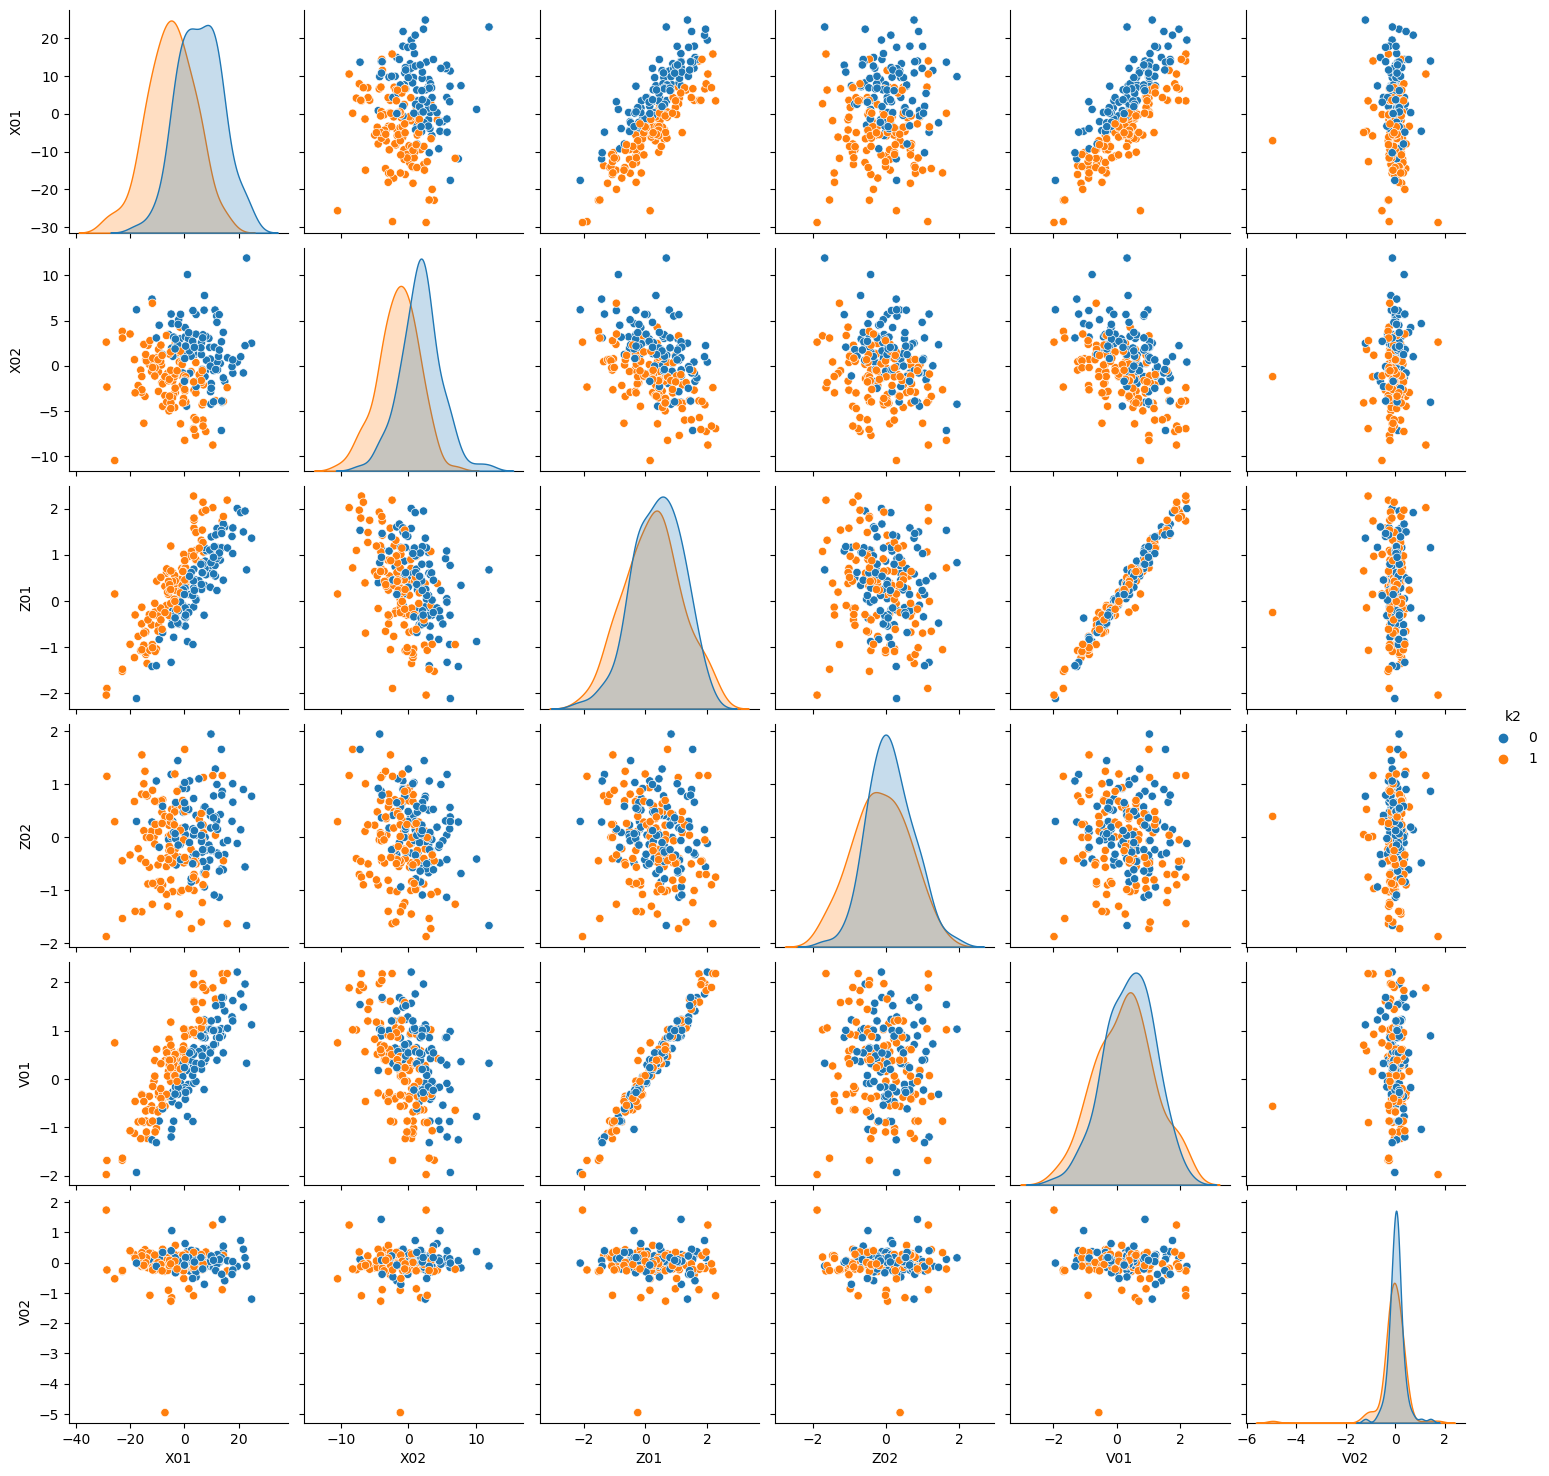

In [311]:
df_clean_copy_part_features = df_clean_copy[['X01','X02','Z01','Z02', 'V01', 'V02','k2' ]].copy()
sns.pairplot(data=df_clean_copy_part_features, hue='k2', diag_kws={'common_norm': False})

We can see a better separation this time visually with (V01, X01) and (X01,X02). Hence our next goal is to seperate the data using them into 2 Kmeans clusters (X01,X02).

In [312]:
df_clean_X01X02feature=Xpoli[:,:2].copy()

In [313]:
df_clean_X01X02feature.shape

(223, 2)

In [314]:
df_clean_copy['k2_X01X02']=pd.Series(KMeans(n_clusters=2, random_state=121, n_init=25, max_iter=500).
                                     fit_predict(df_clean_X01X02feature),
                                     index=df_clean.index)

In [315]:
df_clean_copy.k2_X01X02.value_counts()


1    125
0     98
Name: k2_X01X02, dtype: int64

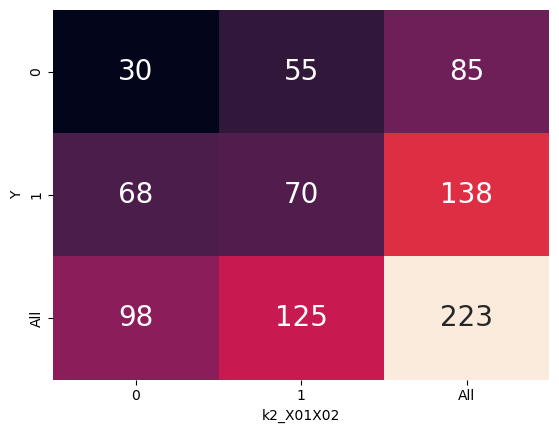

In [316]:
fig, ax = plt.subplots()

sns.heatmap(data = pd.crosstab( df_clean_copy.Y, df_clean_copy.k2_X01X02, margins=True),
            annot=True, annot_kws={'fontsize': 20}, fmt='g',
            cbar=False,
            ax=ax )

plt.show()

There are clearly mismatch between `Y` and `K_X01X02` but we can see below that the data can be seperated visually using them.

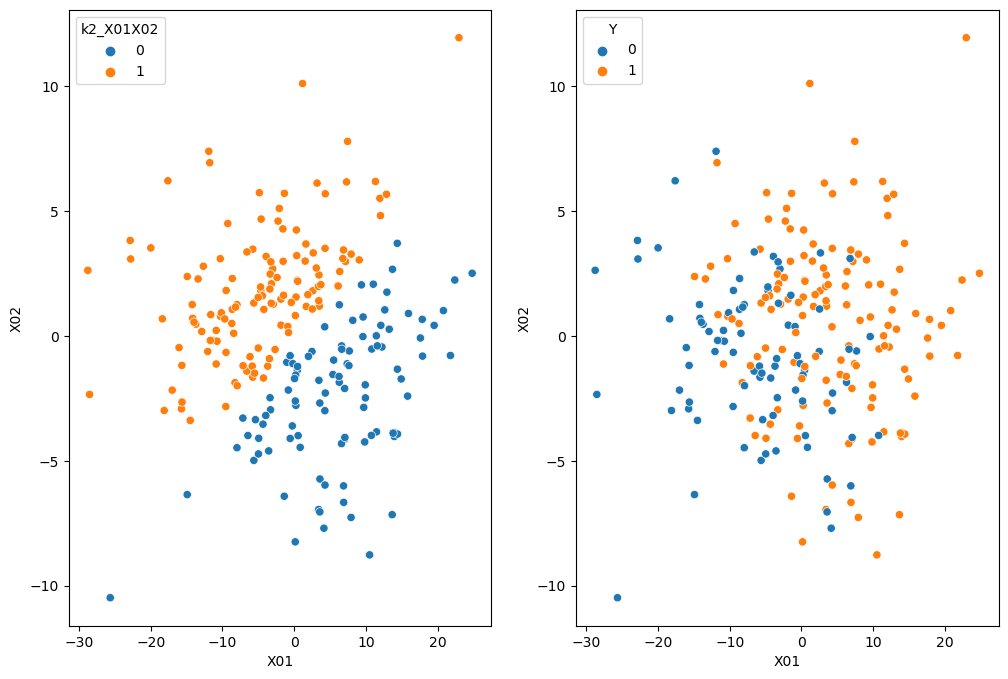

In [317]:
fig, axs =plt.subplots(1,2, figsize=(12,8))
    
    
sns.scatterplot(data=df_clean_copy, x='X01', y='X02', hue='k2_X01X02', ax=axs[0])
sns.scatterplot(data=df_clean_copy, x='X01', y='X02', hue='Y', ax=axs[1])

plt.show()

Similarly we can do it for (V01, X01). Now the problem arises 
* how can we choose 2 features that can replace the 63 columns in the classification problem?
* how can we seperate the data which will match up with Y seperation?( I don't know so far whether it is actually possible or not.)

To answer the first one we will use PCA. Observe that cunningly we mention 2 feature variables but none has taken an oath to replace 63 variables by 2. There are algorithm to select optimal number of replace feature variables but we don't know that yet.

What we can see for the cluster that `k2=0` captures `Y=1` a lot.

In [319]:
from sklearn.decomposition import PCA

pca_poli = PCA(n_components=2).fit_transform( Xpoli )

In [320]:
pca_poli.shape

(223, 2)

In [321]:
type(pca_poli)

numpy.ndarray

In [322]:
pca_poli_df = pd.DataFrame( pca_poli, columns=['pc01', 'pc02'] )


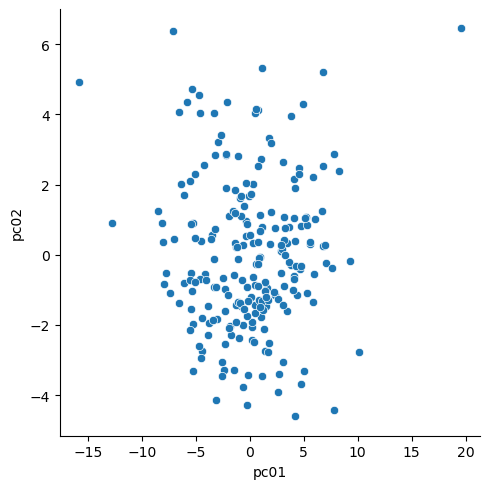

In [323]:
sns.relplot(data = pca_poli_df, x='pc01', y='pc02')

plt.show()

In [324]:
pca_poli_df['Y']=df_clean_copy.Y

In [325]:
pca_poli_df['k2']=df_clean_copy.k2

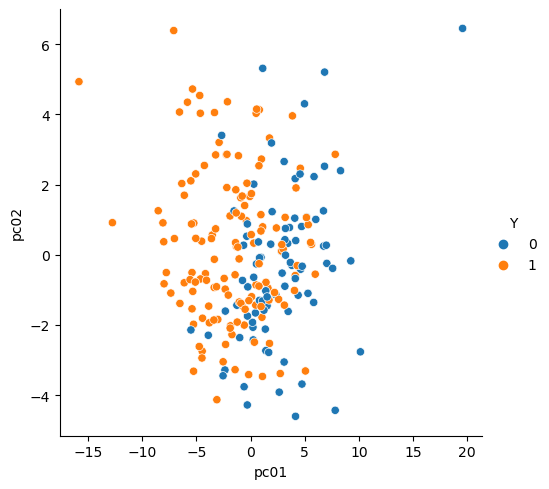

In [326]:
sns.relplot(data = pca_poli_df, x='pc01', y='pc02', hue='Y')

plt.show()

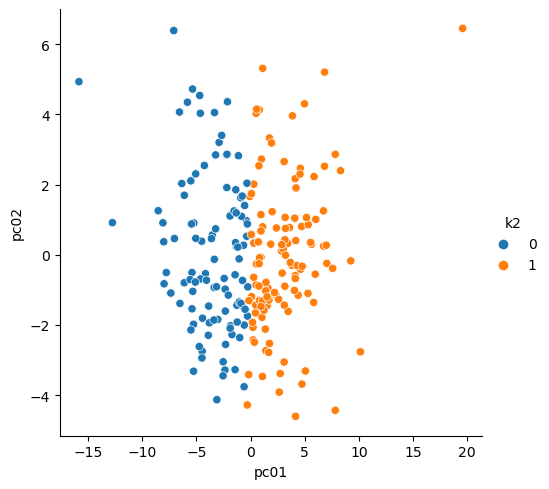

In [327]:
sns.relplot(data = pca_poli_df, x='pc01', y='pc02', hue='k2')

plt.show()

In [328]:
pca_poli_df['k2_X01X02']=df_clean_copy.k2_X01X02

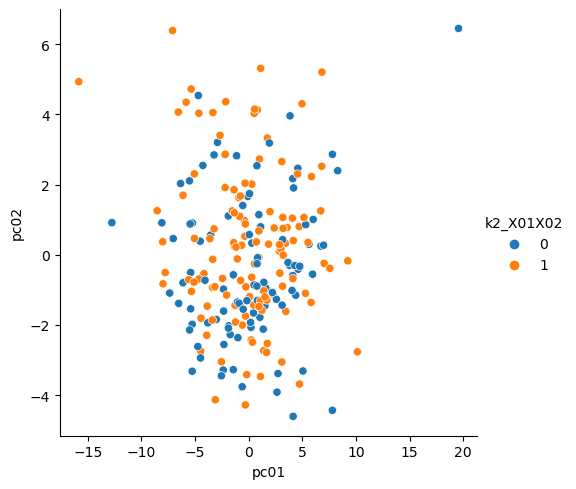

In [329]:
sns.relplot(data = pca_poli_df, x='pc01', y='pc02', hue='k2_X01X02')

plt.show()

So, we can see clearly that the `pc01` and `pc02` seperates the data into two distinct parts of the kmeans clustering `k2`.

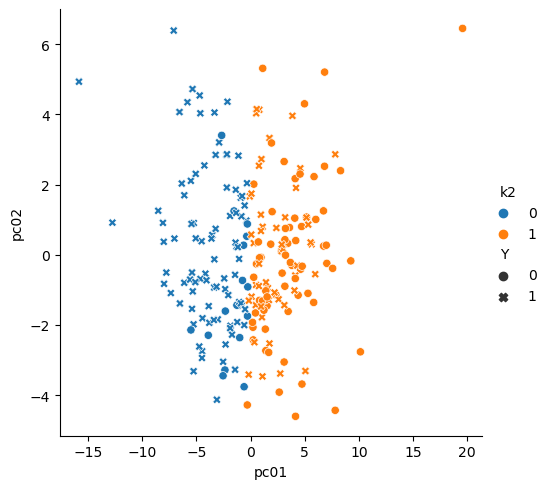

In [330]:
sns.relplot(data = pca_poli_df, x='pc01', y='pc02', hue='k2', style='Y')

plt.show()

Recall the kmeans result:

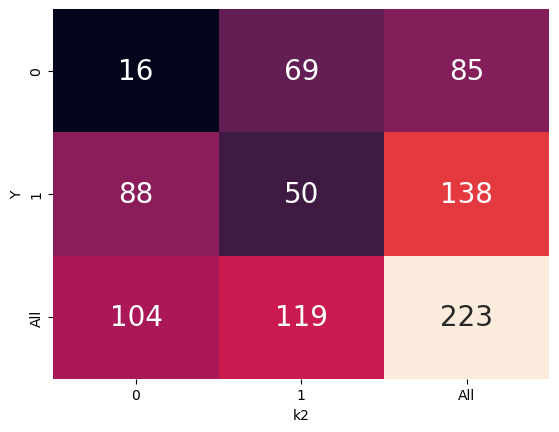

In [331]:
fig, ax = plt.subplots()

sns.heatmap(data = pd.crosstab( df_clean_copy.Y, df_clean_copy.k2, margins=True),
            annot=True, annot_kws={'fontsize': 20}, fmt='g',
            cbar=False,
            ax=ax )

plt.show()

We can see similar thing in the graph a lot of `k2=0` is `Y=1`. and we can see that just by `pc01` and `pc02` in stead of 63 features.

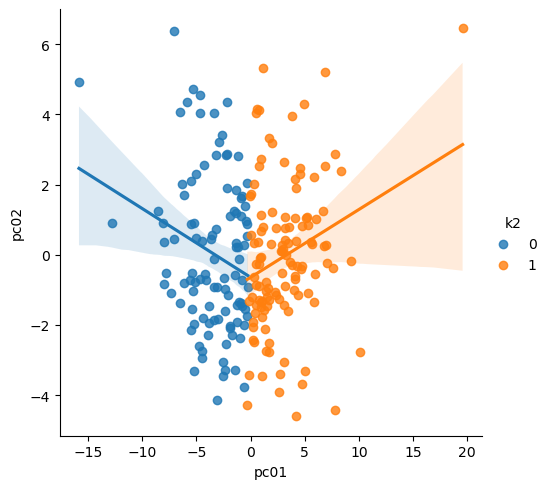

In [332]:
sns.lmplot(data = pca_poli_df, x='pc01', y='pc02', hue='k2')

plt.show()

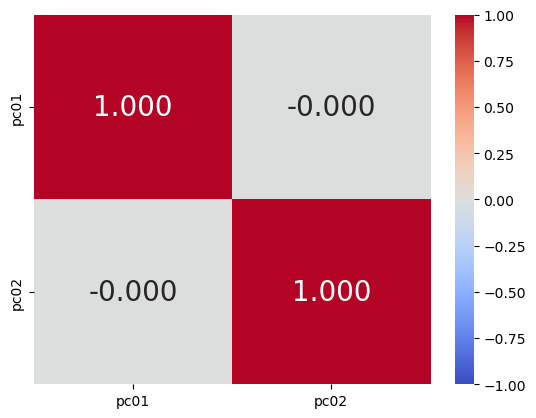

In [337]:
fig, ax=plt.subplots()

sns.heatmap(data=pca_poli_df.loc[:,['pc01','pc02']].corr(),
            vmin=-1, vmax=1, center = 0,
            cmap='coolwarm', annot=True, fmt='.3f',
            annot_kws={'size':20},
            ax=ax)

plt.show()

Hence, two principal components are uncorrelated.

After working on this project. I am getting more interested on this one. I am curious on how to find important optimal features that will give us close approximation of categorical clustering with `Y` and also eager to know about the probability computation in `PCA`.

Pairplot helped me a lot for identify potential input-to- output relationships.

I guess (X01,X02) and (X01,V01) are useful response variable.